In [573]:
# importing necessary modules
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Activation
import tensorflow
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve

In [574]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [575]:
from sklearn.metrics import roc_auc_score

In [576]:
from sklearn.model_selection import StratifiedKFold

In [577]:
import seaborn as sns
from sklearn.model_selection import cross_val_predict

In [6]:
import random
np.random.seed(21)

In [161]:
import time

In [7]:
import tensorflow as tf 
tf.random.set_seed(2)

In [538]:
from sklearn import tree

In [124]:
from sklearn.metrics import get_scorer
roc_auc_scorer = get_scorer('roc_auc')
precision_scorer = get_scorer('precision')
recall_scorer=get_scorer('recall')
f1_scorer=get_scorer('f1')
accuracy_scorer = get_scorer('accuracy')

In [ ]:
# collecting the datasets - train and test, checking them (to final combine into 1 csv)

In [9]:
col_names =['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [10]:
file_train = pd.read_csv('adult.data',header=None, names =col_names)

In [11]:
file_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
file_train['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [13]:
24720/7841

3.152659099604642

In [14]:
file_train['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        48
10520       43
4064        42
4650        41
14084       41
20051       37
3137        37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
4787        23
2176        23
3464        23
9386        22
2597        20
4101        20
2407        19
4865        17
2202        16
1506        15
3942        14
3674        14
4508        12
4416        12
3781        12
2580        12
10605       12
2907        11
25236       11
5455        11
6497        11
2354        11
2635        11
2463        11
2964         9
2105         9
6418         9
7430         9
2414         8
914          8
2977         8
1151         8
3471         8
4934         7
1471         7
1831         7
1797         7
3818         7
1409      

In [15]:
file_train['capital-loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
1485       51
2415       49
1602       47
1740       42
1590       40
1876       39
1672       34
1564       25
2258       25
1669       24
1741       24
2001       24
1980       23
1719       22
2002       21
2051       21
1408       21
1579       20
2377       20
1721       18
1504       18
1974       18
2339       17
2179       15
1628       15
1762       14
2444       12
2559       12
625        12
2824       10
2042        9
1617        9
2205        9
1651        9
2392        9
1594        8
1340        7
1380        7
1092        7
2174        7
1573        6
880         6
2246        6
2057        6
2206        6
2603        5
1668        4
1825        4
1258        4
2547        4
1726        4
213         4
2457        3
2129        3
653         3
2231        3
419         3
323         3
4356        3
2267        3
3683        2
1755        2
2352        2
1648        2
1138        2
810         2
1735  

In [16]:
file_train['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [17]:
file_train['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [18]:
file_train[file_train['workclass']==' ?']['workclass'].count()

1836

In [19]:
file_train[file_train['education']==' ?']['workclass'].count()

0

In [20]:
file_train[file_train['marital_status']==' ?']['marital_status'].count()

0

In [21]:
file_train[file_train['occupation']==' ?']['occupation'].count()

1843

In [22]:
file_train[file_train['relationship']==' ?']['relationship'].count()

0

In [23]:
file_train[file_train['race']==' ?']['race'].count()

0

In [24]:
file_train[file_train['sex']==' ?']['sex'].count()

0

In [25]:
file_train[file_train['native-country']==' ?']['native-country'].count()

583

In [26]:
file_train[(file_train['workclass']==' ?')|(file_train['occupation']==' ?')|(file_train['native-country']==' ?')].count()

age               2399
workclass         2399
fnlwgt            2399
education         2399
education_num     2399
marital_status    2399
occupation        2399
relationship      2399
race              2399
sex               2399
capital-gain      2399
capital-loss      2399
hours-per-week    2399
native-country    2399
income            2399
dtype: int64

In [ ]:
# dropping missing value in train file

In [27]:
file_train2 = file_train.drop(file_train[(file_train['workclass']==' ?')|(file_train['occupation']==' ?')|(file_train['native-country']==' ?')].index)

In [28]:
file_train2.shape

(30162, 15)

In [29]:
file_train2['income'].value_counts()

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

In [30]:
22654/7508

3.017314864144912

In [31]:
file_train.shape

(32561, 15)

In [32]:
file_test = pd.read_csv('adult.test',header=None,names =col_names)

In [33]:
file_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [34]:
file_test['income'].value_counts()

 <=50K.    12435
 >50K.      3846
Name: income, dtype: int64

In [35]:
12435/3846

3.233229329173167

In [36]:
file_test.shape

(16281, 15)

In [37]:
file_test[file_test['workclass']==' ?']['workclass'].count()

963

In [38]:
file_test[file_test['education']==' ?']['workclass'].count()

0

In [39]:
file_test[file_test['marital_status']==' ?']['marital_status'].count()

0

In [40]:
file_test[file_test['occupation']==' ?']['occupation'].count()

966

In [41]:
file_test[file_test['relationship']==' ?']['relationship'].count()

0

In [42]:
file_test[file_test['race']==' ?']['race'].count()

0

In [43]:
file_test[file_test['sex']==' ?']['sex'].count()

0

In [44]:
file_test[file_test['native-country']==' ?']['native-country'].count()

274

In [45]:
file_test[(file_test['workclass']==' ?')|(file_test['occupation']==' ?')|(file_test['native-country']==' ?')].count()

age               1221
workclass         1221
fnlwgt            1221
education         1221
education_num     1221
marital_status    1221
occupation        1221
relationship      1221
race              1221
sex               1221
capital-gain      1221
capital-loss      1221
hours-per-week    1221
native-country    1221
income            1221
dtype: int64

In [ ]:
# dropping missing value in test file

In [46]:
file_test2 =file_test.drop(file_test[(file_test['workclass']==' ?')|(file_test['occupation']==' ?')|(file_test['native-country']==' ?')].index)

In [47]:
file_test2.shape

(15060, 15)

In [48]:
file_test2['income'].value_counts()

 <=50K.    11360
 >50K.      3700
Name: income, dtype: int64

In [49]:
11360/3700

3.0702702702702704

In [50]:
file_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [51]:
file_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [52]:
file_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# combining provided train and test files into big file

In [53]:
big_file = file_train.append(file_test)

In [54]:
big_file.shape

(48842, 15)

In [55]:
big_file2 = big_file.copy()

In [ ]:
# dropping missing values in big file

In [56]:
big_file2 = big_file2.drop(big_file2[(big_file2['workclass']==' ?')|(big_file2['occupation']==' ?')|(big_file2['native-country']==' ?')].index)

In [57]:
big_file2.shape

(42960, 15)

In [ ]:
# processing features

In [58]:
big_file2['income'].value_counts()

 <=50K     21786
 <=50K.    10512
 >50K       7237
 >50K.      3425
Name: income, dtype: int64

In [59]:
big_file2['income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [60]:
big_file2.loc[:,'income'].replace({' <=50K.':' <=50K',' >50K.':' >50K'},inplace=True)

In [61]:
big_file2['income'].value_counts()

 <=50K    32298
 >50K     10662
Name: income, dtype: int64

In [62]:
big_file2['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [63]:
big_file2.loc[:,'income'].replace({' <=50K':'<=50K',' >50K':'>50K'}, inplace=True)

In [64]:
big_file2['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [65]:
big_file2['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Local-gov',
       ' Federal-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [66]:
big_file2['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced', ' Separated',
       ' Married-AF-spouse', ' Widowed', ' Married-spouse-absent'],
      dtype=object)

In [67]:
big_file2['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Transport-moving', ' Farming-fishing',
       ' Machine-op-inspct', ' Sales', ' Other-service', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [68]:
big_file2['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [69]:
big_file2['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [70]:
big_file2['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [536]:
big_file2['native-country'].nunique()

41

In [71]:
big_file2['native-country'].unique()

array([' United-States', ' India', ' Mexico', ' Honduras', ' Puerto-Rico',
       ' Cuba', ' England', ' Canada', ' Germany', ' Iran',
       ' Philippines', ' Poland', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Jamaica', ' Guatemala', ' Italy',
       ' South', ' Japan', ' Yugoslavia', ' China', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Columbia', ' Ireland',
       ' Hungary', ' Hong', ' Holand-Netherlands'], dtype=object)

In [72]:
big_file2['native-country'].value_counts()

 United-States                 39216
 Mexico                          869
 Philippines                     269
 Germany                         179
 Puerto-Rico                     163
 Canada                          158
 India                           140
 El-Salvador                     139
 Cuba                            128
 England                         112
 China                           110
 Jamaica                          99
 South                            95
 Italy                            92
 Dominican-Republic               91
 Japan                            86
 Vietnam                          81
 Guatemala                        80
 Columbia                         78
 Poland                           76
 Haiti                            65
 Portugal                         59
 Iran                             55
 Taiwan                           52
 Greece                           46
 Peru                             45
 Nicaragua                        45
 

In [73]:
big_file2['education'].value_counts()

 HS-grad         14042
 Some-college     9430
 Bachelors        7181
 Masters          2382
 Assoc-voc        1856
 11th             1544
 Assoc-acdm       1432
 10th             1166
 7th-8th           780
 Prof-school       732
 9th               638
 12th              554
 Doctorate         515
 5th-6th           427
 1st-4th           213
 Preschool          68
Name: education, dtype: int64

In [74]:
big_file2['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' Some-college',
       ' 7th-8th', ' Doctorate', ' Assoc-acdm', ' 9th', ' Assoc-voc',
       ' Prof-school', ' 5th-6th', ' 10th', ' Preschool', ' 12th',
       ' 1st-4th'], dtype=object)

In [537]:
big_file2['education'].nunique()

16

In [75]:
ed_map ={' Preschool':1,' 1st-4th':2,' 5th-6th':3,' 7th-8th':4,' 9th':5,' 10th':6,' 11th':7,' 12th':8,' HS-grad':9,' Prof-school':10,' Assoc-acdm':11,' Assoc-voc':12,' Some-college':13,' Bachelors':14, ' Masters':15,' Doctorate':16}

In [76]:
big_file2.loc[:,'education']=big_file2.loc[:,'education'].apply(lambda x: ed_map[x])

In [77]:
big_file2['education'].unique()

array([14,  9,  7, 15, 13,  4, 16, 11,  5, 12, 10,  3,  6,  1,  8,  2])

In [78]:
big_file3=pd.get_dummies(big_file2[['workclass','marital_status','occupation','relationship','race','sex']],drop_first=True)

In [79]:
big_file3.head(2)

,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [80]:
big_file4= pd.concat([big_file3,big_file2[['education','age','fnlwgt','education_num','capital-gain','capital-loss','hours-per-week','income']]],axis=1)

In [81]:
big_file4.head(2)

,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,education,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week,income
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,14,39,77516,13,2174,0,40,<=50K
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,14,50,83311,13,0,0,13,<=50K


In [82]:
big_file4.shape

(42960, 43)

In [83]:
big_file4['income'].value_counts()

<=50K    32298
>50K     10662
Name: income, dtype: int64

In [84]:
32298/10662

3.0292628024760835

In [85]:
big_file5 = big_file4.copy()

In [86]:
income_map={'<=50K':0,'>50K':1 }

In [87]:
big_file5['income']=big_file5['income'].apply(lambda x : income_map[x])

In [88]:
big_file5['income'].value_counts()

0    32298
1    10662
Name: income, dtype: int64

In [89]:
big_file5.iloc[:4,35:]

,education,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week,income
0,14,39,77516,13,2174,0,40,0
1,14,50,83311,13,0,0,13,0
2,9,38,215646,9,0,0,40,0
3,7,53,234721,7,0,0,40,0


In [544]:
big_file5.head(2)

,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,education,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week,income
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,14,39,77516,13,2174,0,40,0
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,14,50,83311,13,0,0,13,0


In [549]:
big_file5.columns

Index(['workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'rac

In [609]:
#big_file5.to_csv('census_processed.csv')

In [ ]:
# separating target and other features

In [90]:
y=big_file5['income'].values
X=big_file5.drop(['income'],axis=1).values

In [546]:
X[:2]

array([[    0,     0,     0,     0,     1,     0,     0,     0,     0,
            1,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     1,     0,
            0,     0,     0,     0,     0,     0,     1,     1,    14,
           39, 77516,    13,  2174,     0,    40],
       [    0,     0,     0,     1,     0,     0,     0,     1,     0,
            0,     0,     0,     0,     0,     1,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     1,     1,    14,
           50, 83311,    13,     0,     0,    13]])

In [91]:
len(y)

42960

In [92]:
X.shape

(42960, 42)

In [ ]:
#splitting train and test sets

In [93]:
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=8,stratify=y,shuffle=True)

In [94]:
np.count_nonzero(y_test)

3199

In [95]:
np.count_nonzero(y_train)

7463

In [96]:
X_train.shape

(30072, 42)

In [97]:
X_test.shape

(12888, 42)

In [98]:
X_train[:5]

array([[     0,      1,      0,      0,      0,      0,      0,      0,
             0,      1,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      1,      0,
             0,      1,      0,      0,      0,      0,      0,      0,
             0,      1,      1,     13,     34, 279015,     10,      0,
             0,     65],
       [     0,      0,      1,      0,      0,      0,      0,      1,
             0,      0,      0,      0,      0,      0,      1,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      1,      1,     13,     57, 257200,     10,      0,
             0,     40],
       [     0,      1,      0,      0,      0,      0,      0,      1,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      1,      0,      0,      0,
             0

In [99]:
X_train[:,35:]

array([[    13,     34, 279015, ...,      0,      0,     65],
       [    13,     57, 257200, ...,      0,      0,     40],
       [     9,     39, 181705, ...,      0,      0,     45],
       ...,
       [    13,     31,  66278, ...,   3908,      0,     40],
       [     9,     27, 245661, ...,      0,      0,     40],
       [    14,     27,  34701, ...,      0,      0,     40]])

In [100]:
X_train_sel = X_train[:,35:]
X_test_sel = X_test[:,35:]

In [ ]:
# standardization

In [101]:
scaler=StandardScaler()
scaler.fit(X_train_sel)

StandardScaler()

In [102]:
X_train_sel_std=scaler.transform(X_train_sel)
X_test_sel_std=scaler.transform(X_test_sel)

In [103]:
X_train[:5,:37]

array([[ 0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  1,  1, 13, 34],
       [ 0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  1, 13, 57],
       [ 0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  1,  9, 39],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  1,  0,  9, 38],
       [ 0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  1,  0,  9, 47]])

In [104]:
X_train_sel_std[:10]

array([[ 0.6940762 , -0.34201662,  0.85014716, -0.04686442, -0.14546947,
        -0.22034609,  1.98624555],
       [ 0.6940762 ,  1.40000516,  0.64256191, -0.04686442, -0.14546947,
        -0.22034609, -0.08004041],
       [-0.64543474,  0.03668377, -0.07582671, -0.43877403, -0.14546947,
        -0.22034609,  0.33321678],
       [-0.64543474, -0.03905631, -1.23055827, -0.43877403, -0.14546947,
        -0.22034609, -0.08004041],
       [-0.64543474,  0.64260439,  1.12825333, -0.43877403, -0.14546947,
        -0.22034609, -0.08004041],
       [ 1.02895394,  0.56686431, -0.83086033,  1.12886441, -0.14546947,
        -0.22034609, -0.08004041],
       [ 0.35919847, -0.49349678,  1.01620583,  0.34504519, -0.14546947,
        -0.22034609, -0.08004041],
       [-0.64543474, -1.32663763,  1.05406885, -0.43877403, -0.14546947,
        -0.22034609, -0.08004041],
       [ 0.6940762 , -0.79645709, -1.1847306 , -0.04686442, -0.14546947,
        -0.22034609,  2.39950274],
       [-0.64543474, -1.4781

In [105]:
a=X_train[:,0:35]
b=X_test[:,0:35]
X_train_scale =np.concatenate([a,X_train_sel_std],axis=1)
X_test_scale =np.concatenate([b,X_test_sel_std],axis=1)

In [106]:
X_train_scale.shape

(30072, 42)

In [107]:
X_test_scale.shape

(12888, 42)

In [108]:
X_train_scale[:5]

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.6940762 , -0.34201662,  0.85014716, -0.04686442, -0.14546947,
        -0.22034609,  1.98624555],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.     

In [ ]:
# decision trees

In [109]:
dt = DecisionTreeClassifier(random_state=21)
accuracy_score_dt = np.mean(cross_val_score(dt,X_train_scale, y_train, scoring ='accuracy' , cv=5))
precision_score_dt = np.mean(cross_val_score(dt,X_train_scale, y_train, scoring ='precision' , cv=5))
recall_score_dt = np.mean(cross_val_score(dt,X_train_scale, y_train, scoring ='recall' , cv=5))
roc_auc_score_dt=np.mean(cross_val_score(dt,X_train_scale, y_train, scoring ='roc_auc' , cv=5))

In [111]:
f1_dt=np.mean(cross_val_score(dt,X_train_scale, y_train, scoring ='f1' , cv=5))

In [112]:
accuracy_score_dt

0.8070631148544779

In [113]:
precision_score_dt

0.6068569852681156

In [114]:
recall_score_dt

0.6327234870862954

In [115]:
roc_auc_score_dt

0.7486675118673111

In [116]:
f1_dt

0.6194185597858268

In [117]:
X_train2,X_test2,y_train2, y_test2=train_test_split(X_train_scale,y_train,test_size=0.3, random_state=8,stratify=y_train,shuffle=True)

In [121]:
dt.fit(X_train2,y_train2)

DecisionTreeClassifier(random_state=21)

In [125]:
precision_scorer(dt,X_test2, y_test2)

0.6252761820592134

In [126]:
recall_scorer(dt,X_test2, y_test2)

0.6319785618579723

In [127]:
f1_scorer(dt,X_test2, y_test2)

0.6286095068858285

In [128]:
roc_auc_scorer(dt,X_test2, y_test2)

0.7534800667169855

In [129]:
accuracy_scorer(dt,X_test2, y_test2)

0.8146752383063622

In [555]:
dt =  DecisionTreeClassifier(random_state=21)
dt.fit(X_train_scale, y_train)
dt.tree_.max_depth

44

In [133]:
y_pred2=dt.predict(X_test2)

Text(33.0, 0.5, 'True label')

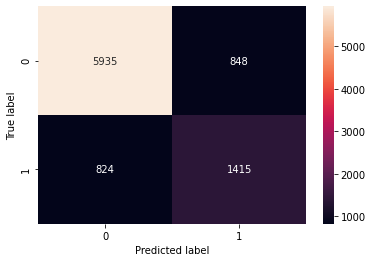

In [134]:
matrix=confusion_matrix(y_test2,y_pred2)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [135]:
dt.tree_.max_depth

39

In [136]:
dt.tree_.n_leaves

3195

In [ ]:
# building base decision tree and checking its performance in learning curve

In [140]:
train_sizes = [100,1000,5000,10000,15000,24057]

In [141]:
#learning curve using 5-fold cross validation
train_sizes_dt, training_scores_dt, validation_scores_dt,fit_times_dt, _ = learning_curve(dt, X_train_scale, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True)

In [142]:
train_scores_mean_dt = np.mean(training_scores_dt,axis = 1)
validation_scores_mean_dt = np.mean(validation_scores_dt, axis = 1 )
fit_times_mean_dt=np.mean(fit_times_dt,axis=1)
train_scores_std_dt = np.std(training_scores_dt,axis = 1)
validation_scores_std_dt = np.std(validation_scores_dt, axis = 1 )
fit_times_std_dt=np.std(fit_times_dt,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_dt, index = train_sizes_dt))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_dt, index = train_sizes_dt))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_dt, index=train_sizes_dt))
print('\n', '-' * 20) # separator
print('Std training scores\n\n', pd.Series(train_scores_std_dt, index = train_sizes_dt))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_dt, index = train_sizes_dt))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_dt, index=train_sizes_dt))

Mean training scores

 100      1.000000
1000     1.000000
5000     1.000000
10000    1.000000
15000    0.999893
24057    0.999883
dtype: float64

 --------------------
Mean validation scores

 100      0.507139
1000     0.582006
5000     0.603471
10000    0.611037
15000    0.614664
24057    0.619201
dtype: float64

 --------------------
fit time

 100      0.001442
1000     0.005247
5000     0.026427
10000    0.059261
15000    0.095636
24057    0.162590
dtype: float64

 --------------------
Std training scores

 100      0.000000
1000     0.000000
5000     0.000000
10000    0.000000
15000    0.000054
24057    0.000067
dtype: float64

 --------------------
Std validation scores

 100      0.023836
1000     0.011147
5000     0.012392
10000    0.006154
15000    0.006943
24057    0.004151
dtype: float64

 --------------------
fit time

 100      0.000109
1000     0.000759
5000     0.000796
10000    0.000819
15000    0.004802
24057    0.008177
dtype: float64


(0.4, 1.0)

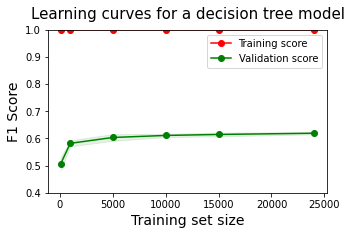

In [152]:
plt.figure(figsize=(5,3))
plt.fill_between(train_sizes_dt, train_scores_mean_dt - train_scores_std_dt, train_scores_mean_dt + train_scores_std_dt, alpha=0.1, color="r")
plt.fill_between(train_sizes_dt, validation_scores_mean_dt - validation_scores_std_dt, validation_scores_mean_dt + validation_scores_std_dt, alpha=0.1, color="g")
plt.plot(train_sizes_dt, train_scores_mean_dt, 'o-', color="r", label="Training score")
plt.plot(train_sizes_dt, validation_scores_mean_dt, 'o-', color="g", label="Validation score")
plt.ylabel('F1 Score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a decision tree model', fontsize = 15, y = 1.03)
plt.legend()
plt.ylim(0.4,1)

In [ ]:
# checking for best ccp_alpha values using grid search and model complexity curve

In [153]:
param_grid = {'ccp_alpha':[0,0.001,0.01,0.05,0.1,0.5,1]}


# Create a basic model
dt2 =  DecisionTreeClassifier(random_state=21)
# Instantiate the grid search model
dt_grid2 = GridSearchCV(estimator = dt2, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 0, scoring = 'f1' )
dt_grid2.fit(X_train_scale, y_train)
print(dt_grid2.best_params_)
score=dt_grid2.best_score_
print("f1: %s" % '{:.2%}'.format(score))

{'ccp_alpha': 0.001}
f1: 62.87%


Text(0, 0.5, 'F1 score')

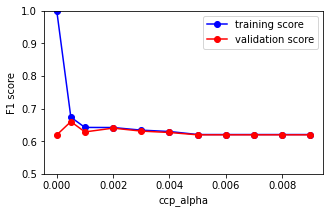

In [280]:
ccp_alpha = [0,0.0005,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009]
dt2 =  DecisionTreeClassifier(random_state=21)
train_score, val_score = validation_curve(dt2,X_train_scale, y_train,
                                          param_name='ccp_alpha', param_range=ccp_alpha, cv=5, scoring='f1')

plt.figure(figsize=(5,3))
plt.plot(ccp_alpha, np.mean(train_score, axis=1),'o-', color='blue', label='training score')
plt.plot(ccp_alpha, np.mean(val_score, axis=1), 'o-',color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0.5, 1)
plt.xlabel('ccp_alpha')
plt.ylabel('F1 score')

In [ ]:
# building final decision tree with ccp_alpha 0.005 and checking its performance with learning curve

In [156]:
dt3 =  DecisionTreeClassifier(random_state=21,ccp_alpha=0.0005)
dt3.fit(X_train_scale, y_train)
dt3.tree_.max_depth

10

In [157]:
train_sizes_dt3, training_scores_dt3, validation_scores_dt3,fit_times_dt3, _ = learning_curve(dt3, X_train_scale, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True)

In [158]:
train_scores_mean_dt3 = np.mean(training_scores_dt3,axis = 1)
validation_scores_mean_dt3 = np.mean(validation_scores_dt3, axis = 1 )
fit_times_mean_dt3=np.mean(fit_times_dt3,axis=1)
train_scores_std_dt3 = np.std(training_scores_dt3,axis = 1)
validation_scores_std_dt3 = np.std(validation_scores_dt3, axis = 1 )
fit_times_std_dt3=np.std(fit_times_dt3,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_dt3, index = train_sizes_dt3))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_dt3, index = train_sizes_dt3))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_dt3, index=train_sizes_dt3))
print('\n', '-' * 20) # separator
print('Std training scores\n\n', pd.Series(train_scores_std_dt3, index = train_sizes_dt3))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_dt3, index = train_sizes_dt3))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_dt3, index=train_sizes_dt3))

Mean training scores

 100      1.000000
1000     0.999615
5000     0.745557
10000    0.691528
15000    0.681639
24057    0.673822
dtype: float64

 --------------------
Mean validation scores

 100      0.530943
1000     0.583209
5000     0.658589
10000    0.658561
15000    0.657560
24057    0.660298
dtype: float64

 --------------------
fit time

 100      0.001427
1000     0.005185
5000     0.027775
10000    0.063970
15000    0.102387
24057    0.182750
dtype: float64

 --------------------
Std training scores

 100      0.000000
1000     0.000771
5000     0.011400
10000    0.013521
15000    0.009084
24057    0.011605
dtype: float64

 --------------------
Std validation scores

 100      0.036513
1000     0.028401
5000     0.012142
10000    0.012673
15000    0.016732
24057    0.014438
dtype: float64

 --------------------
fit time

 100      0.000086
1000     0.000315
5000     0.001214
10000    0.004855
15000    0.003513
24057    0.003984
dtype: float64


(0.4, 1.0)

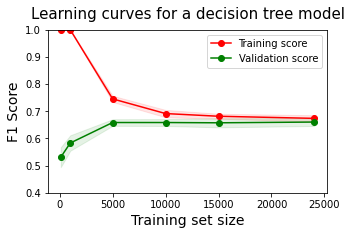

In [159]:
plt.figure(figsize=(5,3))
plt.fill_between(train_sizes_dt3, train_scores_mean_dt3 - train_scores_std_dt3, train_scores_mean_dt3 + train_scores_std_dt3, alpha=0.1, color="r")
plt.fill_between(train_sizes_dt3, validation_scores_mean_dt3 - validation_scores_std_dt3, validation_scores_mean_dt3 + validation_scores_std_dt3, alpha=0.1, color="g")
plt.plot(train_sizes_dt3, train_scores_mean_dt3, 'o-', color="r", label="Training score")
plt.plot(train_sizes_dt3, validation_scores_mean_dt3, 'o-', color="g", label="Validation score")
plt.ylabel('F1 Score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a decision tree model', fontsize = 15, y = 1.03)
plt.legend()
plt.ylim(0.4,1)

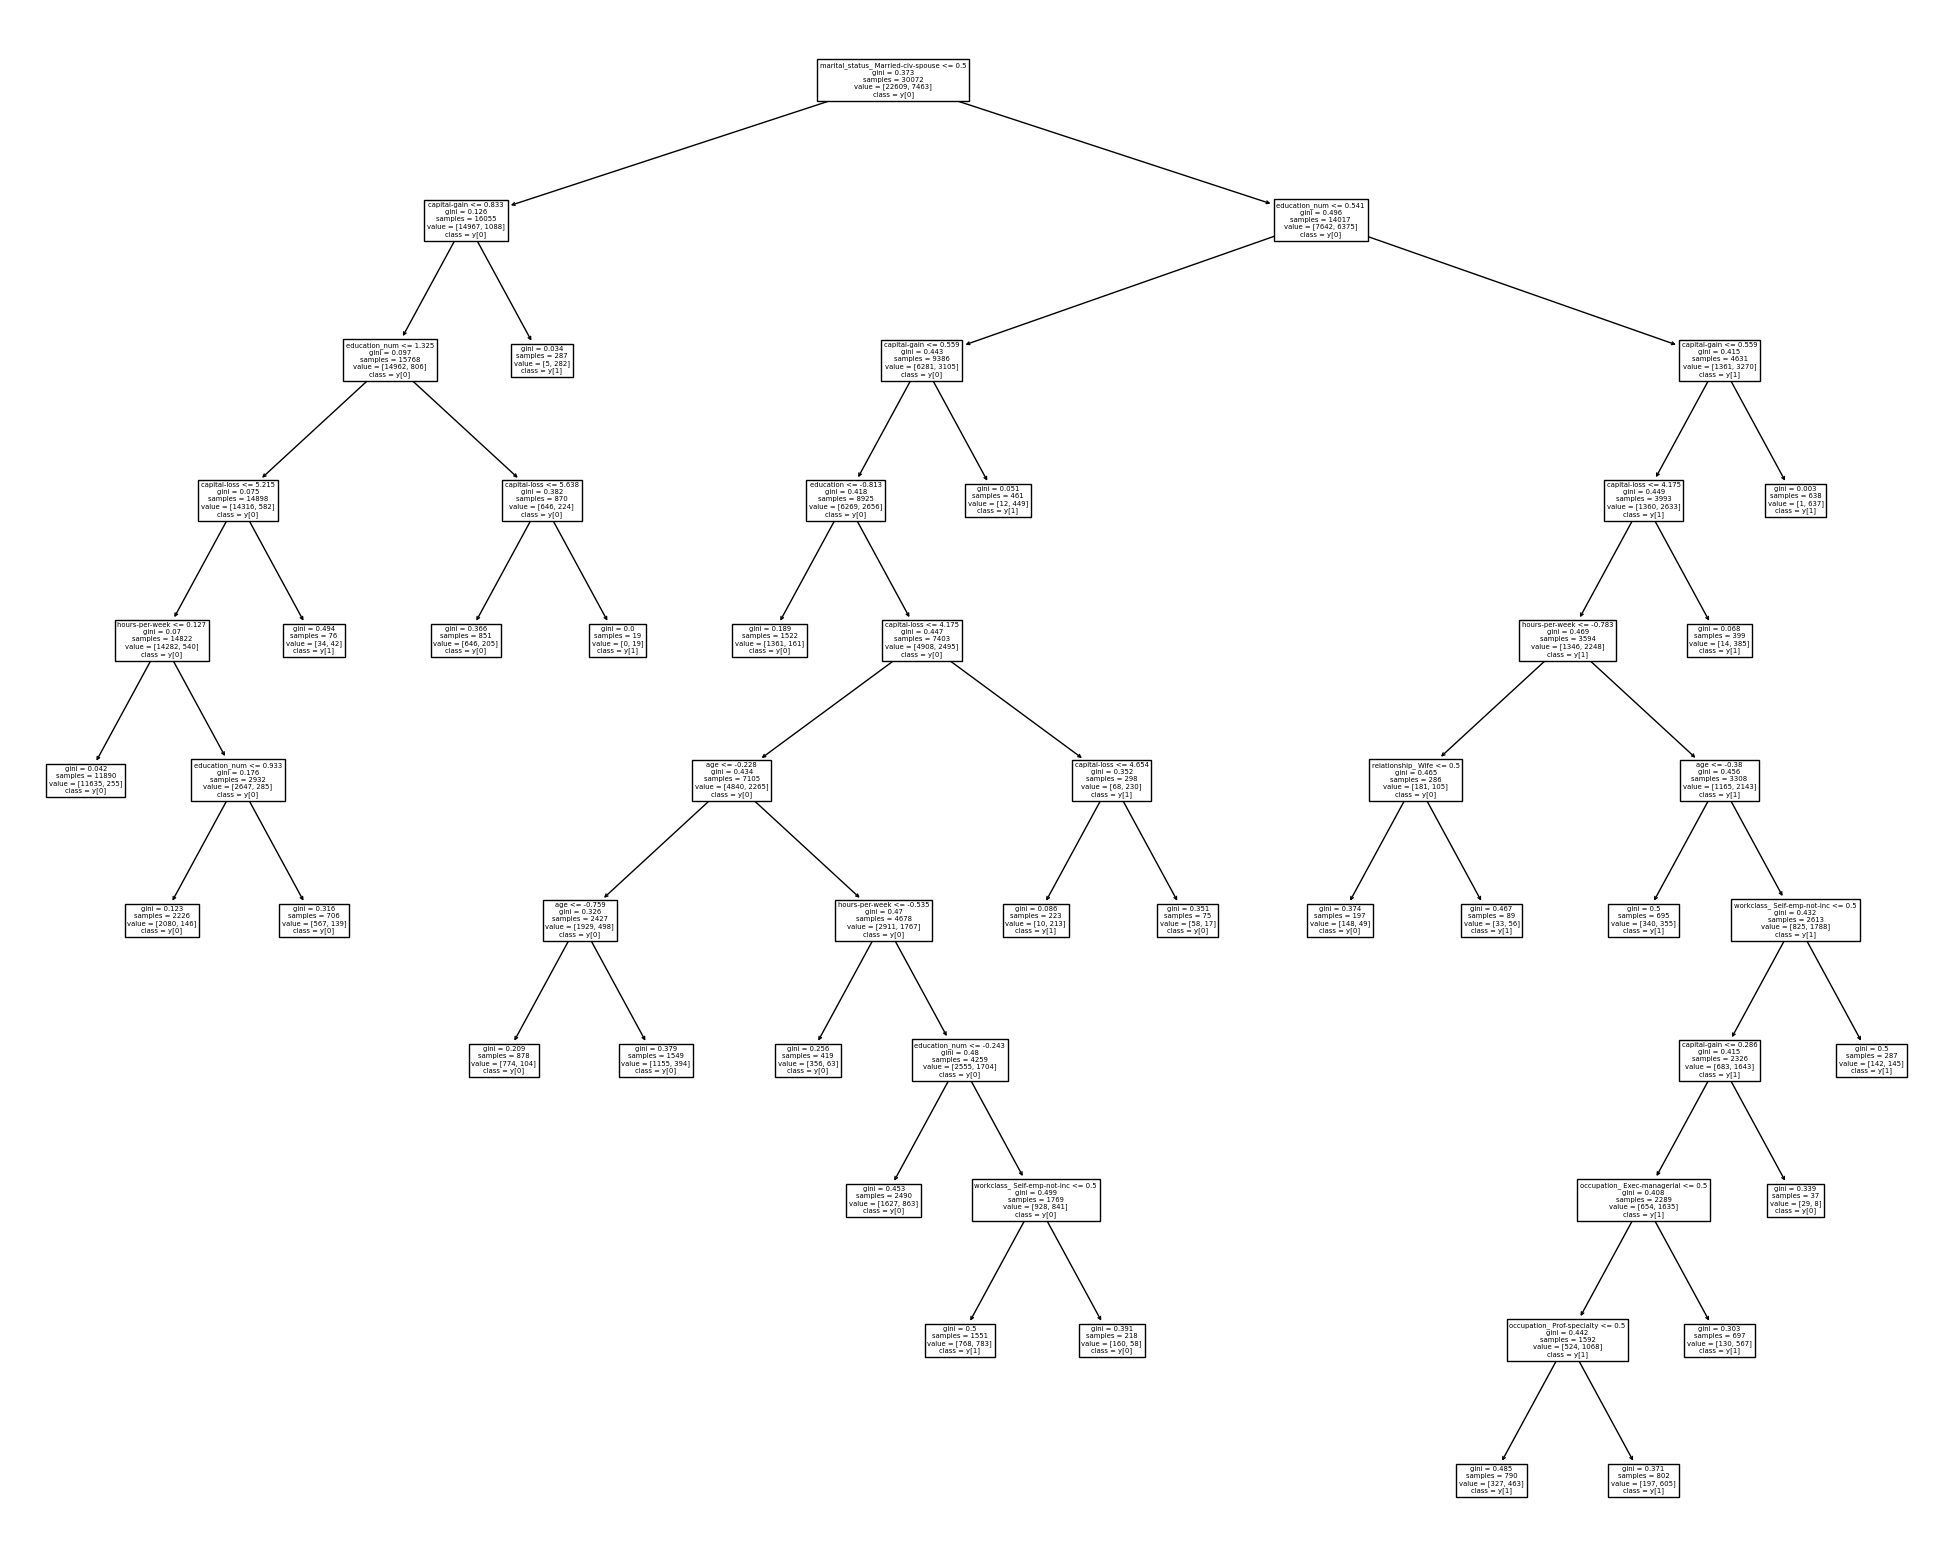

In [553]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(dt3, class_names=True,feature_names= big_file5.columns)  

In [ ]:
# checking performance of the final decision tree on test set

In [170]:
start = time.time()
dt3.fit(X_train_scale,y_train)
end = time.time()
print('fit time: {:.6f}s'.format(end - start))

fit time: 0.259468s


In [171]:
start = time.time()
y_pred_dt=dt3.predict(X_test_scale)
end = time.time()
print('predict time: {:.6f}s'.format(end - start))

predict time: 0.002376s


Text(33.0, 0.5, 'True label')

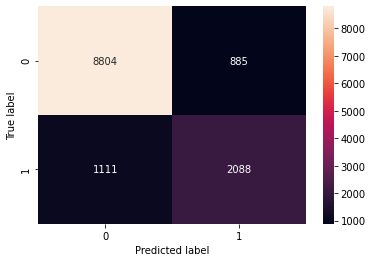

In [172]:
matrix=confusion_matrix(y_test,y_pred_dt)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [173]:
precision_scorer(dt3, X_test_scale,y_test)

0.7023208879919274

In [174]:
recall_scorer(dt3, X_test_scale,y_test)

0.6527039699906221

In [175]:
f1_scorer(dt3, X_test_scale,y_test)

0.676604018146468

In [176]:
roc_auc_scorer(dt3, X_test_scale,y_test)

0.8954211520649177

In [177]:
accuracy_scorer (dt3, X_test_scale,y_test)

0.8451272501551831

In [ ]:
#knn

In [178]:
knn = KNeighborsClassifier()

In [179]:
accuracy_score_knn = np.mean(cross_val_score(knn,X_train_scale, y_train, scoring ='accuracy' , cv=5))
precision_score_knn = np.mean(cross_val_score(knn,X_train_scale, y_train, scoring ='precision' , cv=5))
recall_score_knn = np.mean(cross_val_score(knn,X_train_scale, y_train, scoring ='recall' , cv=5))
roc_auc_score_knn=np.mean(cross_val_score(knn,X_train_scale, y_train, scoring ='roc_auc' , cv=5))
f1_knn=np.mean(cross_val_score(knn,X_train_scale, y_train, scoring ='f1' , cv=5))

In [180]:
accuracy_score_knn

0.8283783115097745

In [181]:
precision_score_knn

0.6697767250572776

In [182]:
recall_score_knn

0.6084670374167922

In [183]:
roc_auc_score_knn

0.8592980027950927

In [184]:
f1_knn

0.6376290357627242

In [ ]:
# building base knn and checking performance on learning curve

In [185]:
train_sizes_knn, training_scores_knn, validation_scores_knn, fit_times_knn, _ = learning_curve(knn, X_train_scale, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1', return_times=True)

In [186]:
train_scores_mean_knn = np.mean(training_scores_knn,axis = 1)
validation_scores_mean_knn = np.mean(validation_scores_knn, axis = 1 )
train_scores_std_knn = np.std(training_scores_knn,axis = 1)
validation_scores_std_knn = np.std(validation_scores_knn, axis = 1 )
fit_times_mean_knn=np.mean(fit_times_knn,axis=1)
fit_times_std_knn=np.std(fit_times_knn,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_knn, index = train_sizes_knn))
print('\n', '-' * 20) # separator 
print('Mean training scores\n\n', pd.Series(validation_scores_mean_knn, index = train_sizes_knn))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_knn, index = train_sizes_knn))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_knn, index = train_sizes_knn))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_knn, index=train_sizes_knn))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_knn, index=train_sizes_knn))

Mean training scores

 100      0.713892
1000     0.728810
5000     0.735319
10000    0.740318
15000    0.745734
24057    0.744432
dtype: float64

 --------------------
Mean training scores

 100      0.504579
1000     0.607722
5000     0.623239
10000    0.625793
15000    0.638885
24057    0.637629
dtype: float64

 --------------------
Std training scores

 100      0.074786
1000     0.021127
5000     0.015642
10000    0.009636
15000    0.005101
24057    0.001621
dtype: float64

 --------------------
Std validation scores

 100      0.083863
1000     0.009209
5000     0.008407
10000    0.005683
15000    0.004953
24057    0.007590
dtype: float64

 --------------------
fit time

 100      0.000996
1000     0.002707
5000     0.026336
10000    0.101109
15000    0.148155
24057    0.572657
dtype: float64

 --------------------
fit time

 100      0.000129
1000     0.000146
5000     0.005522
10000    0.027254
15000    0.008114
24057    0.019609
dtype: float64


(0.4, 0.8)

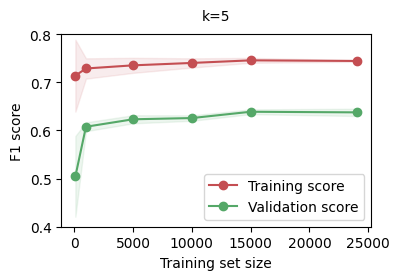

In [594]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_knn, train_scores_mean_knn - train_scores_std_knn, train_scores_mean_knn + train_scores_std_knn, alpha=0.1, color="r")
plt.fill_between(train_sizes_knn, validation_scores_mean_knn- validation_scores_std_knn  , validation_scores_mean_knn+ validation_scores_std_knn , alpha=0.1, color="g")
plt.plot(train_sizes_knn, train_scores_mean_knn, 'o-', color="r", label="Training score")
plt.plot(train_sizes_knn, validation_scores_mean_knn, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('k=5', fontsize = 10, y = 1.03)
plt.legend()
plt.ylim(0.4,.8)

In [ ]:
# checking for best number of neighbors using model complexity 

In [188]:
n_neighbors = [1,5,10,15,20,30,40,50,60,70,80,90,100]
train_score_k2, val_score_k2 = validation_curve(knn,X_train_scale, y_train,
                                          param_name='n_neighbors', param_range=n_neighbors, cv=5, scoring='f1', verbose=10)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=1.000, test=0.584), total=   3.7s
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV] ... n_neighbors=5, score=(train=0.743, test=0.647), total=   5.8s
[CV] n_neighbors=10 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   34.7s remaining:    0.0s


[CV] .. n_neighbors=10, score=(train=0.692, test=0.645), total=   6.3s
[CV] n_neighbors=15 ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s


[CV] .. n_neighbors=15, score=(train=0.696, test=0.661), total=   6.9s
[CV] n_neighbors=20 ..................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s


[CV] .. n_neighbors=20, score=(train=0.677, test=0.651), total=   7.4s
[CV] n_neighbors=30 ..................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min remaining:    0.0s


[CV] .. n_neighbors=30, score=(train=0.677, test=0.654), total=   7.9s
[CV] n_neighbors=40 ..................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.8min remaining:    0.0s


[CV] .. n_neighbors=40, score=(train=0.672, test=0.648), total=   8.2s
[CV] n_neighbors=50 ..................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.5min remaining:    0.0s


[CV] .. n_neighbors=50, score=(train=0.666, test=0.652), total=   8.6s
[CV] n_neighbors=60 ..................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.2min remaining:    0.0s


[CV] .. n_neighbors=60, score=(train=0.661, test=0.652), total=   8.6s
[CV] n_neighbors=70 ..................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.9min remaining:    0.0s


[CV] .. n_neighbors=70, score=(train=0.659, test=0.655), total=   8.9s
[CV] n_neighbors=80 ..................................................
[CV] .. n_neighbors=80, score=(train=0.657, test=0.655), total=   9.4s
[CV] n_neighbors=90 ..................................................
[CV] .. n_neighbors=90, score=(train=0.653, test=0.657), total=   9.0s
[CV] n_neighbors=100 .................................................
[CV] . n_neighbors=100, score=(train=0.654, test=0.659), total=   9.6s
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=1.000, test=0.599), total=   3.5s
[CV] n_neighbors=5 ...................................................
[CV] ... n_neighbors=5, score=(train=0.743, test=0.645), total=   5.4s
[CV] n_neighbors=10 ..................................................
[CV] .. n_neighbors=10, score=(train=0.684, test=0.639), total=   6.0s
[CV] n_neighbors=15 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed: 39.1min finished


Text(0, 0.5, 'F1 score')

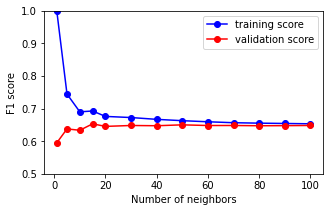

In [194]:
plt.figure(figsize=(5,3))
plt.plot(n_neighbors, np.mean(train_score_k2, axis=1),'o-', color='blue', label='training score')
plt.plot(n_neighbors, np.mean(val_score_k2, axis=1), 'o-',color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0.5,1)
plt.xlabel('Number of neighbors')
plt.ylabel('F1 score')

In [ ]:
# building final knn model with 15 n_neighbors and checking its performance

In [195]:
knn2 = KNeighborsClassifier(n_neighbors=15)

In [196]:
train_sizes_knn2, training_scores_knn2, validation_scores_knn2, fit_times_knn2, _ = learning_curve(knn2, X_train_scale, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1', return_times=True)

In [197]:
train_scores_mean_knn2 = np.mean(training_scores_knn2,axis = 1)
validation_scores_mean_knn2 = np.mean(validation_scores_knn2, axis = 1 )
train_scores_std_knn2 = np.std(training_scores_knn2,axis = 1)
validation_scores_std_knn2 = np.std(validation_scores_knn2, axis = 1 )
fit_times_mean_knn2=np.mean(fit_times_knn2,axis=1)
fit_times_std_knn2=np.std(fit_times_knn2,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_knn2, index = train_sizes_knn2))
print('\n', '-' * 20) # separator 
print('Mean training scores\n\n', pd.Series(validation_scores_mean_knn2, index = train_sizes_knn2))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_knn2, index = train_sizes_knn2))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_knn2, index = train_sizes_knn2))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_knn2, index=train_sizes_knn2))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_knn2, index=train_sizes_knn2))

Mean training scores

 100      0.621003
1000     0.677331
5000     0.682685
10000    0.690139
15000    0.692226
24057    0.692571
dtype: float64

 --------------------
Mean training scores

 100      0.500116
1000     0.621378
5000     0.636946
10000    0.645505
15000    0.650857
24057    0.653232
dtype: float64

 --------------------
Std training scores

 100      0.130434
1000     0.030887
5000     0.010637
10000    0.005374
15000    0.006669
24057    0.003394
dtype: float64

 --------------------
Std validation scores

 100      0.098101
1000     0.012494
5000     0.008992
10000    0.012629
15000    0.010763
24057    0.006705
dtype: float64

 --------------------
fit time

 100      0.001177
1000     0.002614
5000     0.026533
10000    0.100689
15000    0.185048
24057    0.516606
dtype: float64

 --------------------
fit time

 100      0.000063
1000     0.000033
5000     0.007888
10000    0.033962
15000    0.049344
24057    0.057918
dtype: float64


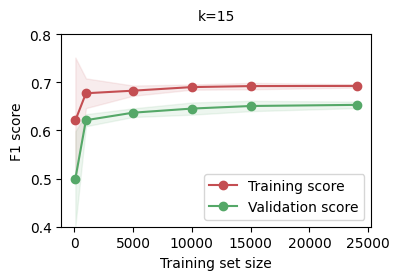

In [593]:
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_knn2, train_scores_mean_knn2 - train_scores_std_knn2, train_scores_mean_knn2 + train_scores_std_knn2, alpha=0.1, color="r")
plt.fill_between(train_sizes_knn2, validation_scores_mean_knn2- validation_scores_std_knn2  , validation_scores_mean_knn2+ validation_scores_std_knn2 , alpha=0.1, color="g")
plt.plot(train_sizes_knn2, train_scores_mean_knn2, 'o-', color="r", label="Training score")
plt.plot(train_sizes_knn2, validation_scores_mean_knn2, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('k=15', fontsize = 10, y = 1.03)
plt.legend()
plt.ylim(0.4,0.8)
plt.legend(loc='best')

In [ ]:
#checking knn with manhattan distance

In [208]:
knn3= KNeighborsClassifier(p=1)
train_sizes_knn3, training_scores_knn3, validation_scores_knn3, fit_times_knn3, _ = learning_curve(knn3, X_train_scale, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True)

In [209]:
train_scores_mean_knn3 = np.mean(training_scores_knn3,axis = 1)
validation_scores_mean_knn3 = np.mean(validation_scores_knn3, axis = 1 )
train_scores_std_knn3 = np.std(training_scores_knn3,axis = 1)
validation_scores_std_knn3 = np.std(validation_scores_knn3, axis = 1 )
fit_times_mean_knn3=np.mean(fit_times_knn3,axis=1)
fit_times_std_knn3=np.std(fit_times_knn3,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_knn3, index = train_sizes_knn3))
print('\n', '-' * 20) # separator 
print('Mean training scores\n\n', pd.Series(validation_scores_mean_knn3, index = train_sizes_knn3))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_knn3, index = train_sizes_knn3))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_knn3, index = train_sizes_knn3))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_knn3, index=train_sizes_knn3))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_knn3, index=train_sizes_knn3))

Mean training scores

 100      0.641530
1000     0.707007
5000     0.734471
10000    0.737147
15000    0.739048
24057    0.740327
dtype: float64

 --------------------
Mean training scores

 100      0.475580
1000     0.590740
5000     0.622987
10000    0.624649
15000    0.625302
24057    0.632016
dtype: float64

 --------------------
Std training scores

 100      0.151693
1000     0.025555
5000     0.005760
10000    0.004119
15000    0.004196
24057    0.002081
dtype: float64

 --------------------
Std validation scores

 100      0.117047
1000     0.007335
5000     0.013538
10000    0.008056
15000    0.006053
24057    0.004198
dtype: float64

 --------------------
fit time

 100      0.000994
1000     0.002700
5000     0.025810
10000    0.075353
15000    0.175558
24057    0.512247
dtype: float64

 --------------------
fit time

 100      0.000104
1000     0.000298
5000     0.006886
10000    0.015153
15000    0.034340
24057    0.045333
dtype: float64


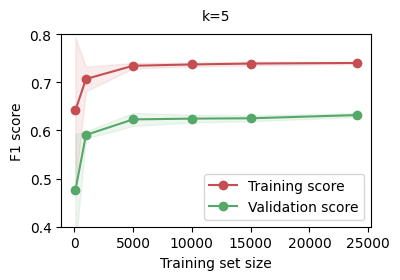

In [596]:
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_knn3, train_scores_mean_knn3 - train_scores_std_knn3, train_scores_mean_knn3 + train_scores_std_knn3, alpha=0.1, color="r")
plt.fill_between(train_sizes_knn3, validation_scores_mean_knn3- validation_scores_std_knn3  , validation_scores_mean_knn3+ validation_scores_std_knn3 , alpha=0.1, color="g")
plt.plot(train_sizes_knn3, train_scores_mean_knn3, 'o-', color="r", label="Training score")
plt.plot(train_sizes_knn3, validation_scores_mean_knn3, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('k=5', fontsize = 10, y = 1.03)
plt.legend()
plt.ylim(0.4,.8)
plt.legend(loc='best')

In [206]:
n_neighbors_k3 = [1,5,10,15,20,30,40,50,60,70,80,90,100]
train_score_k3, val_score_k3 = validation_curve(knn3,X_train_scale, y_train,
                                          param_name='n_neighbors', param_range=n_neighbors_k3, cv=5, scoring='f1', verbose=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=1.000, test=0.586), total=   4.1s
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s remaining:    0.0s


[CV] ... n_neighbors=5, score=(train=0.740, test=0.628), total=   6.7s
[CV] n_neighbors=10 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   40.6s remaining:    0.0s


[CV] .. n_neighbors=10, score=(train=0.683, test=0.631), total=   7.6s
[CV] n_neighbors=15 ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min remaining:    0.0s


[CV] .. n_neighbors=15, score=(train=0.691, test=0.655), total=   8.5s
[CV] n_neighbors=20 ..................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.0min remaining:    0.0s


[CV] .. n_neighbors=20, score=(train=0.672, test=0.642), total=   8.9s
[CV] n_neighbors=30 ..................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.6min remaining:    0.0s


[CV] .. n_neighbors=30, score=(train=0.667, test=0.647), total=   9.3s
[CV] n_neighbors=40 ..................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.4min remaining:    0.0s


[CV] .. n_neighbors=40, score=(train=0.664, test=0.652), total=  10.5s
[CV] n_neighbors=50 ..................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  4.2min remaining:    0.0s


[CV] .. n_neighbors=50, score=(train=0.661, test=0.653), total=  10.1s
[CV] n_neighbors=60 ..................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  5.0min remaining:    0.0s


[CV] .. n_neighbors=60, score=(train=0.660, test=0.657), total=  10.7s
[CV] n_neighbors=70 ..................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  5.8min remaining:    0.0s


[CV] .. n_neighbors=70, score=(train=0.656, test=0.658), total=  10.8s
[CV] n_neighbors=80 ..................................................
[CV] .. n_neighbors=80, score=(train=0.655, test=0.651), total=  10.5s
[CV] n_neighbors=90 ..................................................
[CV] .. n_neighbors=90, score=(train=0.653, test=0.652), total=  10.9s
[CV] n_neighbors=100 .................................................
[CV] . n_neighbors=100, score=(train=0.652, test=0.652), total=  10.8s
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=1.000, test=0.595), total=   4.0s
[CV] n_neighbors=5 ...................................................
[CV] ... n_neighbors=5, score=(train=0.737, test=0.640), total=   6.3s
[CV] n_neighbors=10 ..................................................
[CV] .. n_neighbors=10, score=(train=0.681, test=0.630), total=   7.0s
[CV] n_neighbors=15 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed: 46.7min finished


Text(0, 0.5, 'F1 score')

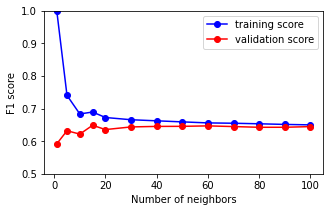

In [207]:
plt.figure(figsize=(5,3))
plt.plot(n_neighbors_k3, np.mean(train_score_k3, axis=1),'o-', color='blue', label='training score')
plt.plot(n_neighbors_k3, np.mean(val_score_k3, axis=1), 'o-',color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0.5,1)
plt.xlabel('Number of neighbors')
plt.ylabel('F1 score')

In [214]:
knn4=KNeighborsClassifier(p=1,n_neighbors=15)

In [215]:
train_sizes_knn4, training_scores_knn4, validation_scores_knn4, fit_times_knn4, _ = learning_curve(knn4, X_train_scale, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True)

In [216]:
train_scores_mean_knn4 = np.mean(training_scores_knn4,axis = 1)
validation_scores_mean_knn4 = np.mean(validation_scores_knn4, axis = 1 )
train_scores_std_knn4 = np.std(training_scores_knn4,axis = 1)
validation_scores_std_knn4 = np.std(validation_scores_knn4, axis = 1 )
fit_times_mean_knn4=np.mean(fit_times_knn4,axis=1)
fit_times_std_knn4=np.std(fit_times_knn4,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_knn4, index = train_sizes_knn4))
print('\n', '-' * 20) # separator 
print('Mean training scores\n\n', pd.Series(validation_scores_mean_knn4, index = train_sizes_knn4))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_knn4, index = train_sizes_knn4))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_knn4, index = train_sizes_knn4))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_knn4, index=train_sizes_knn4))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_knn4, index=train_sizes_knn4))

Mean training scores

 100      0.617775
1000     0.667420
5000     0.677170
10000    0.690001
15000    0.687185
24057    0.689451
dtype: float64

 --------------------
Mean training scores

 100      0.509383
1000     0.614683
5000     0.630519
10000    0.643368
15000    0.643675
24057    0.648795
dtype: float64

 --------------------
Std training scores

 100      0.099748
1000     0.008904
5000     0.014368
10000    0.009812
15000    0.005210
24057    0.003241
dtype: float64

 --------------------
Std validation scores

 100      0.098209
1000     0.012232
5000     0.010395
10000    0.005704
15000    0.005925
24057    0.007331
dtype: float64

 --------------------
fit time

 100      0.001102
1000     0.002578
5000     0.021868
10000    0.085179
15000    0.156431
24057    0.512819
dtype: float64

 --------------------
fit time

 100      0.000086
1000     0.000075
5000     0.005611
10000    0.025207
15000    0.012004
24057    0.020826
dtype: float64


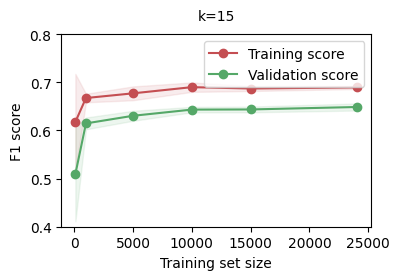

In [597]:
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_knn4, train_scores_mean_knn4 - train_scores_std_knn4, train_scores_mean_knn4 + train_scores_std_knn4, alpha=0.1, color="r")
plt.fill_between(train_sizes_knn4, validation_scores_mean_knn4- validation_scores_std_knn4  , validation_scores_mean_knn4+ validation_scores_std_knn4 , alpha=0.1, color="g")
plt.plot(train_sizes_knn4, train_scores_mean_knn4, 'o-', color="r", label="Training score")
plt.plot(train_sizes_knn4, validation_scores_mean_knn4, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('k=15', fontsize = 10, y = 1.03)
plt.legend()
plt.ylim(0.4,.8)
plt.legend(loc='best')

In [ ]:
# checking knn2 performance on test set

In [218]:
start = time.time()
knn2.fit(X_train_scale,y_train)
end = time.time()
print('fit time: {:.6f}s'.format(end - start))

fit time: 0.865124s


In [219]:
start = time.time()
y_pred_knn=knn2.predict(X_test_scale)
end = time.time()
print('predict time: {:.6f}s'.format(end - start))

predict time: 15.649159s


Text(33.0, 0.5, 'True label')

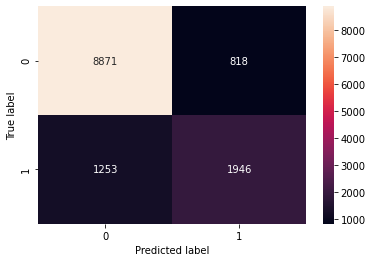

In [220]:
matrix=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [221]:
precision_scorer(knn2, X_test_scale,y_test)

0.7040520984081042

In [222]:
recall_scorer(knn2, X_test_scale,y_test)

0.6083150984682714

In [223]:
f1_scorer(knn2, X_test_scale,y_test)

0.652691598188831

In [224]:
roc_auc_scorer(knn2, X_test_scale,y_test)

0.8909274594951443

In [225]:
accuracy_scorer(knn2, X_test_scale,y_test)

0.8393078833022967

In [ ]:
# svc

In [226]:
svc = SVC(random_state=21, gamma='scale')

In [228]:
accuracy_score_svc = np.mean(cross_val_score(svc,X_train_scale, y_train, scoring ='accuracy' , cv=5))
precision_score_svc = np.mean(cross_val_score(svc,X_train_scale, y_train, scoring ='precision' , cv=5))
recall_score_svc = np.mean(cross_val_score(svc,X_train_scale, y_train, scoring ='recall' , cv=5))
roc_auc_score_svc=np.mean(cross_val_score(svc,X_train_scale, y_train, scoring ='roc_auc' , cv=5))
f1_svc=np.mean(cross_val_score(svc,X_train_scale, y_train, scoring ='f1' , cv=5))

In [229]:
accuracy_score_svc

0.8531190259579959

In [230]:
precision_score_svc

0.7593272481673218

In [231]:
recall_score_svc

0.5974830711326673

In [232]:
roc_auc_score_svc

0.8962420447530228

In [233]:
f1_svc

0.6687115086867197

In [ ]:
# building svc with rbf kernel and checking its performance

In [234]:
svc_rbf = SVC(random_state=21, gamma='scale',kernel='rbf')

In [235]:
train_sizes_svc1, training_scores_svc1, validation_scores_svc1,fit_times_svc1,_ = learning_curve(svc_rbf, X_train_scale, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1', return_times=True)

In [236]:
train_scores_mean_svc1 = np.mean(training_scores_svc1,axis = 1)
validation_scores_mean_svc1 = np.mean(validation_scores_svc1, axis = 1 )
train_scores_std_svc1 = np.std(training_scores_svc1,axis = 1)
validation_scores_std_svc1 = np.std(validation_scores_svc1, axis = 1 )
fit_times_mean_svc1=np.mean(fit_times_svc1,axis=1)
fit_times_std_svc1=np.std(fit_times_svc1,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_svc1, index = train_sizes_svc1))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_svc1, index = train_sizes_svc1))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_svc1, index = train_sizes_svc1))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_svc1, index = train_sizes_svc1))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_svc1, index=train_sizes_svc1))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_svc1, index=train_sizes_svc1))

Mean training scores

 100      0.705509
1000     0.701843
5000     0.699220
10000    0.688952
15000    0.687604
24057    0.686776
dtype: float64

 --------------------
Mean validation scores

 100      0.363957
1000     0.621734
5000     0.651143
10000    0.660267
15000    0.666310
24057    0.668762
dtype: float64

 --------------------
Std training scores

 100      0.089415
1000     0.026826
5000     0.015512
10000    0.011014
15000    0.007574
24057    0.003405
dtype: float64

 --------------------
Std validation scores

 100      0.070335
1000     0.014796
5000     0.010969
10000    0.006220
15000    0.007731
24057    0.010091
dtype: float64

 --------------------
fit time

 100       0.001636
1000      0.031497
5000      0.664696
10000     2.795112
15000     6.492474
24057    16.876452
dtype: float64

 --------------------
fit time

 100      0.000160
1000     0.001648
5000     0.031124
10000    0.029146
15000    0.141808
24057    0.178108
dtype: float64


(0.2, 0.9)

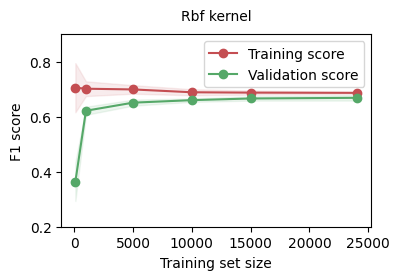

In [598]:
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_svc1, train_scores_mean_svc1 - train_scores_std_svc1, train_scores_mean_svc1 + train_scores_std_svc1, alpha=0.1, color="r")
plt.fill_between(train_sizes_svc1, validation_scores_mean_svc1 - validation_scores_std_svc1  , validation_scores_mean_svc1+ validation_scores_std_svc1 , alpha=0.1, color="g")
plt.plot(train_sizes_svc1, train_scores_mean_svc1, 'o-', color="r", label="Training score")
plt.plot(train_sizes_svc1, validation_scores_mean_svc1, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Rbf kernel', fontsize = 10, y = 1.03)
plt.legend()
plt.ylim(0.2,.9)

In [ ]:
# building svc with polynomial kernel and checking its performance

In [241]:
svc_poly = SVC(random_state=21, gamma='scale',kernel='poly')

In [242]:
train_sizes_svc2, training_scores_svc2, validation_scores_svc2,fit_times_svc2,_ = learning_curve(svc_poly, X_train_scale, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1', return_times=True)

In [243]:
train_scores_mean_svc2 = np.mean(training_scores_svc2,axis = 1)
validation_scores_mean_svc2 = np.mean(validation_scores_svc2, axis = 1 )
train_scores_std_svc2 = np.std(training_scores_svc2,axis = 1)
validation_scores_std_svc2 = np.std(validation_scores_svc2, axis = 1 )
fit_times_mean_svc2=np.mean(fit_times_svc2,axis=1)
fit_times_std_svc2=np.std(fit_times_svc2,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_svc2, index = train_sizes_svc2))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_svc2, index = train_sizes_svc2))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_svc2, index = train_sizes_svc2))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_svc2, index = train_sizes_svc2))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_svc2, index=train_sizes_svc2))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_svc2, index=train_sizes_svc2))

Mean training scores

 100      0.632394
1000     0.691119
5000     0.685663
10000    0.681694
15000    0.682799
24057    0.681431
dtype: float64

 --------------------
Mean validation scores

 100      0.355312
1000     0.566259
5000     0.623164
10000    0.640403
15000    0.650245
24057    0.659413
dtype: float64

 --------------------
Std training scores

 100      0.157885
1000     0.017888
5000     0.005628
10000    0.005268
15000    0.004276
24057    0.003637
dtype: float64

 --------------------
Std validation scores

 100      0.142038
1000     0.028276
5000     0.008222
10000    0.011876
15000    0.010611
24057    0.010008
dtype: float64

 --------------------
fit time

 100       0.001696
1000      0.026848
5000      0.594653
10000     2.712106
15000     6.007675
24057    14.749717
dtype: float64

 --------------------
fit time

 100      0.000176
1000     0.001643
5000     0.024762
10000    0.074352
15000    0.163387
24057    0.468107
dtype: float64


(0.2, 0.9)

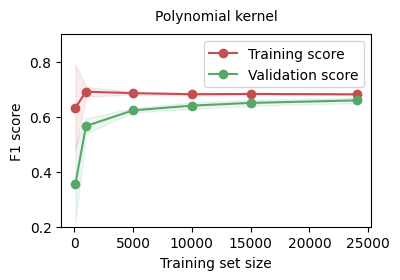

In [602]:
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_svc2, train_scores_mean_svc2 - train_scores_std_svc2, train_scores_mean_svc2 + train_scores_std_svc2, alpha=0.1, color="r")
plt.fill_between(train_sizes_svc2, validation_scores_mean_svc2 - validation_scores_std_svc2  , validation_scores_mean_svc2+ validation_scores_std_svc2 , alpha=0.1, color="g")
plt.plot(train_sizes_svc2, train_scores_mean_svc2, 'o-', color="r", label="Training score")
plt.plot(train_sizes_svc2, validation_scores_mean_svc2, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Polynomial kernel', fontsize = 10, y = 1.03)
plt.legend()
plt.ylim(0.2,.9)

In [ ]:
# building svc with linear kernel and checking its performance

In [246]:
svc_linear = SVC(random_state=21, gamma='scale',kernel='linear')

In [247]:
train_sizes_svc3, training_scores_svc3, validation_scores_svc3,fit_times_svc3,_ = learning_curve(svc_linear, X_train_scale, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1', return_times=True)

In [248]:
train_scores_mean_svc3 = np.mean(training_scores_svc3,axis = 1)
validation_scores_mean_svc3 = np.mean(validation_scores_svc3, axis = 1 )
train_scores_std_svc3 = np.std(training_scores_svc3,axis = 1)
validation_scores_std_svc3 = np.std(validation_scores_svc3, axis = 1 )
fit_times_mean_svc3=np.mean(fit_times_svc3,axis=1)
fit_times_std_svc3=np.std(fit_times_svc3,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_svc3, index = train_sizes_svc3))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_svc3, index = train_sizes_svc3))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_svc3, index = train_sizes_svc3))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_svc3, index = train_sizes_svc3))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_svc3, index=train_sizes_svc3))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_svc3, index=train_sizes_svc3))

Mean training scores

 100      0.856447
1000     0.687328
5000     0.664068
10000    0.662145
15000    0.661278
24057    0.662200
dtype: float64

 --------------------
Mean validation scores

 100      0.579251
1000     0.658729
5000     0.660683
10000    0.662339
15000    0.659722
24057    0.657664
dtype: float64

 --------------------
Std training scores

 100      0.040190
1000     0.031778
5000     0.015128
10000    0.012010
15000    0.003425
24057    0.002759
dtype: float64

 --------------------
Std validation scores

 100      0.028636
1000     0.013268
5000     0.014611
10000    0.010502
15000    0.008568
24057    0.007207
dtype: float64

 --------------------
fit time

 100       0.001533
1000      0.026549
5000      0.711605
10000     3.222743
15000     7.289838
24057    17.663781
dtype: float64

 --------------------
fit time

 100      0.000086
1000     0.001590
5000     0.046710
10000    0.076669
15000    0.097320
24057    0.516530
dtype: float64


(0.2, 0.9)

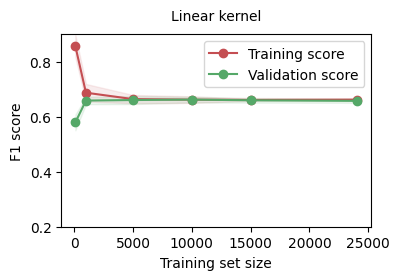

In [601]:
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_svc3, train_scores_mean_svc3 - train_scores_std_svc3, train_scores_mean_svc3 + train_scores_std_svc3, alpha=0.1, color="r")
plt.fill_between(train_sizes_svc3, validation_scores_mean_svc3 - validation_scores_std_svc3  , validation_scores_mean_svc3+ validation_scores_std_svc3 , alpha=0.1, color="g")
plt.plot(train_sizes_svc3, train_scores_mean_svc3, 'o-', color="r", label="Training score")
plt.plot(train_sizes_svc3, validation_scores_mean_svc3, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Linear kernel', fontsize = 10, y = 1.03)
plt.legend()
plt.ylim(0.2,.9)

In [ ]:
# checking for best C value for rbf kernel (using grid search and model complexity curve)

In [251]:
param_grid = {"C": [0.001,0.1,0.5,1]}

# Create a basic model
svc_rbf = SVC(random_state=21, gamma='scale',kernel='rbf')
# Instantiate the grid search model
svc_rbf_grid = GridSearchCV(estimator = svc_rbf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 0, scoring = 'f1' )
svc_rbf_grid.fit(X_train_scale, y_train)
print(svc_rbf_grid.best_params_)
score=svc_rbf_grid.best_score_
print("f1: %s" % '{:.2%}'.format(score))

{'C': 1}
f1: 66.87%


In [252]:
param_grid = {"C": [0.1,1,10,100]}
# Create a basic model
svc_rbf = SVC(random_state=21, gamma='scale',kernel='rbf')
# Instantiate the grid search model
svc_rbf_grid = GridSearchCV(estimator = svc_rbf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 0, scoring = 'f1' )
svc_rbf_grid.fit(X_train_scale, y_train)
print(svc_rbf_grid.best_params_)
score=svc_rbf_grid.best_score_
print("f1: %s" % '{:.2%}'.format(score))

{'C': 10}
f1: 67.31%


In [256]:
C_value = [1,10,20,30,40,50,60,70,80,90,100]
train_score_svc4, val_score_svc4 = validation_curve(svc_rbf  ,X_train_scale, y_train,
                                          param_name ='C', param_range=C_value, cv=5, scoring='f1', n_jobs=-1, verbose=1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed: 17.6min finished


Text(0, 0.5, 'F1 score')

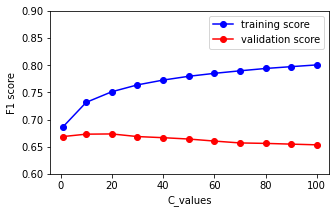

In [260]:
plt.figure(figsize=(5,3))
plt.plot(C_value, np.mean(train_score_svc4, axis=1),'o-', color='blue', label='training score')
plt.plot(C_value, np.mean(val_score_svc4, axis=1), 'o-',color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0.6, .9)
plt.xlabel('C_values')
plt.ylabel('F1 score')

In [ ]:
# building svc-rbf kernel with C value of 10 and checking its performance

In [261]:
svc_rbf2 = SVC(random_state=21, gamma='scale',kernel='rbf',C=10)

In [262]:
train_sizes_svc5, training_scores_svc5, validation_scores_svc5,fit_times_svc5,_ = learning_curve(svc_rbf2, X_train_scale, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1', return_times=True)

In [263]:
train_scores_mean_svc5 = np.mean(training_scores_svc5,axis = 1)
validation_scores_mean_svc5 = np.mean(validation_scores_svc5, axis = 1 )
train_scores_std_svc5 = np.std(training_scores_svc5,axis = 1)
validation_scores_std_svc5 = np.std(validation_scores_svc5, axis = 1 )
fit_times_mean_svc5=np.mean(fit_times_svc5,axis=1)
fit_times_std_svc5=np.std(fit_times_svc5,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_svc5, index = train_sizes_svc5))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_svc5, index = train_sizes_svc5))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_svc5, index = train_sizes_svc5))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_svc5, index = train_sizes_svc5))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_svc5, index=train_sizes_svc5))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_svc5, index=train_sizes_svc5))

Mean training scores

 100      0.967652
1000     0.861884
5000     0.789740
10000    0.761953
15000    0.747288
24057    0.731593
dtype: float64

 --------------------
Mean validation scores

 100      0.496931
1000     0.634686
5000     0.662253
10000    0.665364
15000    0.668656
24057    0.673085
dtype: float64

 --------------------
Std training scores

 100      0.021306
1000     0.015192
5000     0.003487
10000    0.002540
15000    0.001475
24057    0.003448
dtype: float64

 --------------------
Std validation scores

 100      0.070226
1000     0.015528
5000     0.012627
10000    0.006421
15000    0.006965
24057    0.008417
dtype: float64

 --------------------
fit time

 100       0.002023
1000      0.035957
5000      0.856474
10000     3.791420
15000     9.327807
24057    25.964654
dtype: float64

 --------------------
fit time

 100      0.000535
1000     0.001512
5000     0.053493
10000    0.087881
15000    0.136402
24057    0.448447
dtype: float64


(0.3, 1.0)

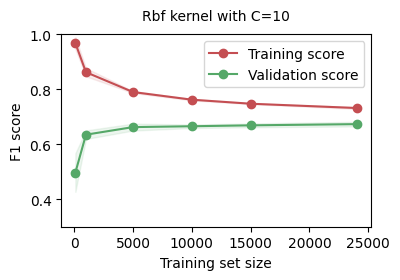

In [603]:
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_svc5, train_scores_mean_svc5 - train_scores_std_svc5, train_scores_mean_svc5 + train_scores_std_svc5, alpha=0.1, color="r")
plt.fill_between(train_sizes_svc5, validation_scores_mean_svc5 - validation_scores_std_svc5  , validation_scores_mean_svc5+ validation_scores_std_svc5 , alpha=0.1, color="g")
plt.plot(train_sizes_svc5, train_scores_mean_svc5, 'o-', color="r", label="Training score")
plt.plot(train_sizes_svc5, validation_scores_mean_svc5, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Rbf kernel with C=10', fontsize = 10, y = 1.03)
plt.legend()
plt.ylim(0.3,1)

In [ ]:
# checking performance of final model on test set

In [271]:
start = time.time()
svc_rbf2.fit(X_train_scale,y_train)
end = time.time()
print('fit time: {:.6f}s'.format(end - start))

fit time: 57.840438s


In [272]:
start = time.time()
y_pred_svc=svc_rbf2.predict(X_test_scale)
end = time.time()
print('predict time: {:.6f}s'.format(end - start))

predict time: 6.783707s


Text(33.0, 0.5, 'True label')

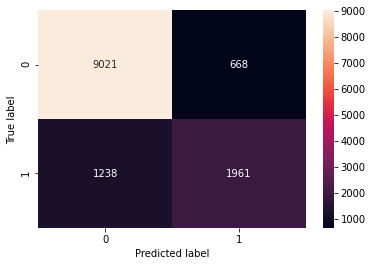

In [273]:
matrix=confusion_matrix(y_test,y_pred_svc)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [274]:
precision_scorer(svc_rbf2, X_test_scale,y_test)

0.7459109927729175

In [275]:
recall_scorer(svc_rbf2, X_test_scale,y_test)

0.6130040637699281

In [276]:
f1_scorer(svc_rbf2, X_test_scale,y_test)

0.6729581331503088

In [277]:
roc_auc_scorer(svc_rbf2, X_test_scale,y_test)

0.8895959430505025

In [278]:
accuracy_scorer(svc_rbf2, X_test_scale,y_test)

0.8521104903786468

In [ ]:
# neural network

In [352]:
# inspired by https://towardsdatascience.com/implementing-macro-f1-score-in-keras-what-not-to-do-e9f1aa04029d
# https://medium.com/@thongonary/how-to-compute-f1-score-for-each-epoch-in-keras-a1acd17715a2
# building f1 scorer for epochs
from keras.callbacks import Callback

class F1Callback(Callback):
    def __init__(self, X_train, y_train, X_val, y_val):   
        super().__init__()
        self.X_train = X_train 
        self.y_train = y_train   
        self.X_val = X_val  
        self.y_val = y_val
        self.val_f1s = []
        self.train_f1s = []
                    
    def on_train_begin(self, logs={}):        
        self.val_f1s = []
        self.train_f1s = []
     
    def on_epoch_end(self, epoch, logs={}):
        y_val_pred = np.asarray(self.model.predict(self.X_val)).round()      
        y_train_pred = np.asarray(self.model.predict(self.X_train)).round()
    
        val_f1 = f1_score(self.y_val, y_val_pred)
        train_f1 =  f1_score(self.y_train, y_train_pred)
       
        self.val_f1s.append(val_f1)
        self.train_f1s.append(train_f1)
        print('epoch: ', len(self.val_f1s), ' val_f1:',val_f1, 'train_f1:', train_f1)

In [353]:
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train_scale, y_train, test_size=0.3, random_state=8, stratify=y_train)

In [354]:
f1_callback = F1Callback(X_train2, y_train2, X_val, y_val)

In [355]:
 X_train_scale.shape

(30072, 42)

In [356]:
def model3():
    #initializer1 = tensorflow.keras.initializers.HeNormal(seed=1)

    model = Sequential()
    model.add(Dense(42, input_dim=42))
    model.add(Activation('relu'))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=[])
    return model

In [524]:
estimator1 = KerasClassifier(build_fn=model3, epochs=50, verbose=0, batch_size=128 )
history = estimator1.fit(X_train2, y_train2, callbacks=f1_callback, validation_data=(X_val,y_val))

epoch:  1  val_f1: 0.6666666666666667 train_f1: 0.6700843746662395
epoch:  2  val_f1: 0.6957892366584103 train_f1: 0.7008464794151597
epoch:  3  val_f1: 0.6534859521331947 train_f1: 0.6572508896797152
epoch:  4  val_f1: 0.6749939947153495 train_f1: 0.6913403537470606
epoch:  5  val_f1: 0.688925464378086 train_f1: 0.6970644608090386
epoch:  6  val_f1: 0.6896390060947023 train_f1: 0.7049869817744844
epoch:  7  val_f1: 0.6590038314176245 train_f1: 0.6747753670830594
epoch:  8  val_f1: 0.6775667227698967 train_f1: 0.6982687551525144
epoch:  9  val_f1: 0.6760493827160493 train_f1: 0.6894003378378378
epoch:  10  val_f1: 0.678639846743295 train_f1: 0.7067021930723508
epoch:  11  val_f1: 0.6790742066332619 train_f1: 0.701664794198754
epoch:  12  val_f1: 0.6751034314918473 train_f1: 0.7011852776044915
epoch:  13  val_f1: 0.6939331970006817 train_f1: 0.7174336973478939
epoch:  14  val_f1: 0.6979896092161735 train_f1: 0.7204812263510235
epoch:  15  val_f1: 0.688966318234611 train_f1: 0.7170187325

In [ ]:
# checking learning curve

Text(0, 0.5, 'F1 score')

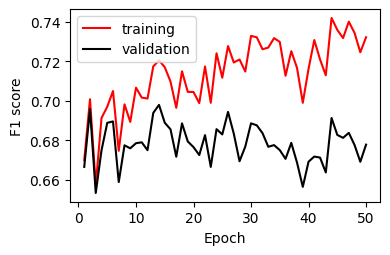

In [525]:
plt.figure(figsize=(4,2.5))
num_layers = list(range(1,51))
plt.plot(num_layers, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_layers, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

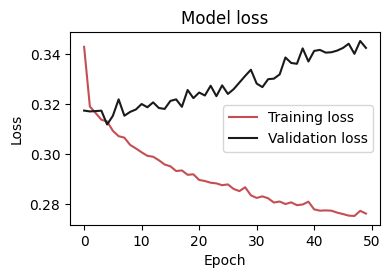

In [526]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [ ]:
# building model for checking and choosing correct hyperparameters

In [427]:
def model2(hidden_layers=1, learning_rate=0.01, width=42):
    #initializer1 = tensorflow.keras.initializers.HeNormal(seed=1)

    model = Sequential()
    model.add(Dense(width, input_dim=42))
    model.add(Activation('relu'))
    for _ in range(1, hidden_layers):
        model.add(Dense(width))
        model.add(Activation('relu'))

    model.add(Dense(1,activation ='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),loss='binary_crossentropy',metrics=[])
    return model

In [429]:
import logging
tf.get_logger().setLevel(logging.ERROR)

In [ ]:
# checking for number of hidden layers

In [440]:
estimator2 = KerasClassifier(build_fn=model2, epochs=14,  verbose=0, batch_size=128)
train_score_h, val_score_h = validation_curve(estimator2, X_train_scale, y_train,
                                          param_name='hidden_layers', param_range=range(1,11),
                                          cv=5, scoring='f1')

Text(0, 0.5, 'F1 score')

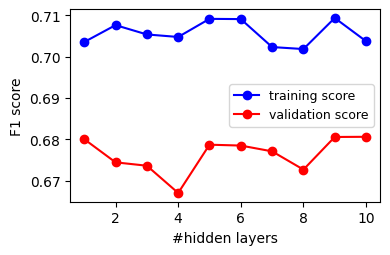

In [441]:
plt.figure(figsize=(4,2.5))
num_layers = list(range(1,11))
plt.plot(num_layers, np.mean(train_score_h, 1), 'o-',color='blue', label='training score')
plt.plot(num_layers, np.mean(val_score_h, 1),'o-', color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('#hidden layers')
plt.ylabel('F1 score')

In [ ]:
# checking for learning rate

In [442]:
estimator2 = KerasClassifier(build_fn=model2, epochs=14,  verbose=0, batch_size=128,hidden_layers=1)
learning_rates = [0.001, 0.01, 0.1]
train_score_l, val_score_l = validation_curve(estimator2, X_train_scale, y_train,
                                          param_name='learning_rate', param_range=learning_rates,
                                          cv=5, scoring='f1')

(0.65, 0.75)

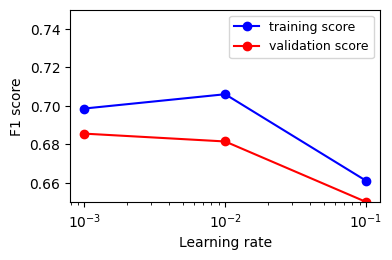

In [447]:
plt.figure(figsize=(4,2.5))
plt.plot(learning_rates, np.mean(train_score_l, 1), 'o-',color='blue', label='training score')
plt.plot(learning_rates, np.mean(val_score_l, 1),'o-', color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('Learning rate')
plt.ylabel('F1 score')
plt.xscale('log')
plt.ylim(0.65,0.75)

In [ ]:
# checking for number of nodes in hidden layer

In [449]:
estimator3 = KerasClassifier(build_fn=model2, epochs=14,  verbose=0, hidden_layers=1, learning_rate=0.01,batch_size=128)
widths = [10,21,42,84]
train_score_w, val_score_w = validation_curve(estimator3, X_train_scale, y_train,
                                          param_name='width', param_range=widths,
                                          cv=5, scoring='f1')


Text(0, 0.5, 'score')

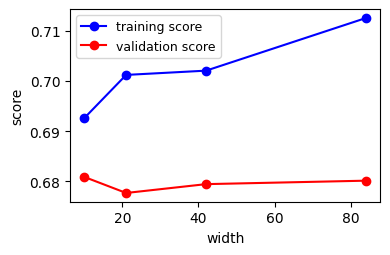

In [452]:
plt.figure(figsize=(4,2.5))
plt.plot(widths, np.mean(train_score_w, 1), 'o-',color='blue', label='training score')
plt.plot(widths, np.mean(val_score_w, 1), 'o-',color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('width')
plt.ylabel('score')

In [ ]:
# checking performance of the initial model

In [527]:
estimator_start = KerasClassifier(build_fn=model2, epochs=50,  verbose=0, batch_size=128,hidden_layers=1,width=42,learning_rate=0.01)

In [528]:
train_sizes_nn2, training_scores_nn_f1_2, validation_scores_nn_f1_2,fit_times_nn_2, _ = learning_curve(estimator_start, X_train_scale, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True)

In [529]:
train_scores_mean_nn2 = np.mean(training_scores_nn_f1_2,axis = 1)
validation_scores_mean_nn2 = np.mean(validation_scores_nn_f1_2, axis = 1 )
train_scores_std_nn2 = np.std(training_scores_nn_f1_2,axis = 1)
validation_scores_std_nn2 = np.std(validation_scores_nn_f1_2, axis = 1 )

print('Mean training scores\n\n', pd.Series(train_scores_mean_nn2, index = train_sizes_nn2))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_nn2, index = train_sizes_nn2))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_nn2, index = train_sizes_nn2))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_nn2, index = train_sizes_nn2))

Mean training scores

 100      0.975641
1000     0.923012
5000     0.806226
10000    0.768065
15000    0.749465
24057    0.723368
dtype: float64

 --------------------
Mean validation scores

 100      0.595864
1000     0.621985
5000     0.643795
10000    0.664312
15000    0.670288
24057    0.671966
dtype: float64

 --------------------
Std training scores

 100      0.033036
1000     0.008638
5000     0.014205
10000    0.008274
15000    0.007452
24057    0.010105
dtype: float64

 --------------------
Std validation scores

 100      0.023118
1000     0.010437
5000     0.011073
10000    0.010670
15000    0.010864
24057    0.007060
dtype: float64


(0.4, 1.0)

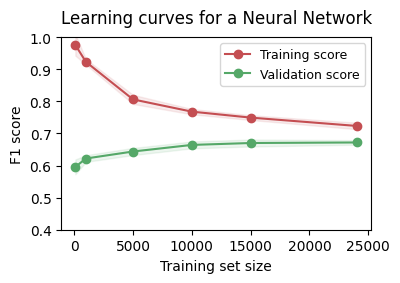

In [530]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_nn2, train_scores_mean_nn2 - train_scores_std_nn2 , train_scores_mean_nn2 + train_scores_std_nn2 , alpha=0.1, color="r")
plt.fill_between(train_sizes_nn2, validation_scores_mean_nn2 - validation_scores_std_nn2 , validation_scores_mean_nn2+ validation_scores_std_nn2 , alpha=0.1, color="g")
plt.plot(train_sizes_nn2, train_scores_mean_nn2, 'o-', color="r", label="Training score")
plt.plot(train_sizes_nn2, validation_scores_mean_nn2, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for a Neural Network', fontsize = 12, y = 1.03)
plt.legend(fontsize = 9)
plt.ylim(0.4,1)

In [531]:
history = estimator_start.fit(X_train2, y_train2, callbacks=f1_callback,validation_data=(X_val,y_val))

epoch:  1  val_f1: 0.6747765640516385 train_f1: 0.6756756756756758
epoch:  2  val_f1: 0.6953195319531954 train_f1: 0.7000385059684251
epoch:  3  val_f1: 0.6568170036288232 train_f1: 0.6597846597846598
epoch:  4  val_f1: 0.6724262059035278 train_f1: 0.6908720040795513
epoch:  5  val_f1: 0.6914446002805049 train_f1: 0.7034634195029444
epoch:  6  val_f1: 0.6926467176989097 train_f1: 0.703678001387925
epoch:  7  val_f1: 0.6663336663336664 train_f1: 0.679703449016869
epoch:  8  val_f1: 0.6849444575750414 train_f1: 0.6989345509893456
epoch:  9  val_f1: 0.674299634591961 train_f1: 0.693561872909699
epoch:  10  val_f1: 0.6793711291090997 train_f1: 0.7027631044290938
epoch:  11  val_f1: 0.6783183750590458 train_f1: 0.7061319325184361
epoch:  12  val_f1: 0.6803105151729005 train_f1: 0.7069035123132823
epoch:  13  val_f1: 0.6875715266651408 train_f1: 0.7134433962264151
epoch:  14  val_f1: 0.6949458483754514 train_f1: 0.7163601161665054
epoch:  15  val_f1: 0.6828584773470342 train_f1: 0.7124514780

Text(0, 0.5, 'F1 score')

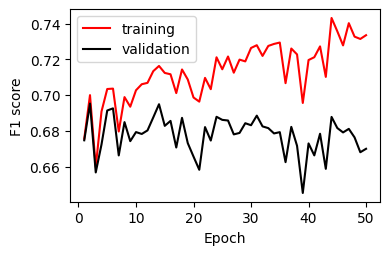

In [533]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,51))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

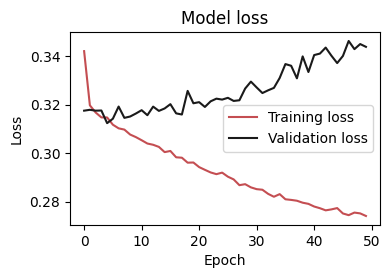

In [534]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [ ]:
# checking performance of the final model

In [484]:
estimator_final = KerasClassifier(build_fn=model2, epochs=14,  verbose=0, hidden_layers=1, width=10, learning_rate=0.01,batch_size=128)

In [485]:
train_sizes_nn, training_scores_nn_f1, validation_scores_nn_f1,fit_times_nn, _ = learning_curve(estimator_final, X_train_scale, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True)

In [486]:
train_scores_mean_nn = np.mean(training_scores_nn_f1,axis = 1)
validation_scores_mean_nn = np.mean(validation_scores_nn_f1, axis = 1 )
train_scores_std_nn = np.std(training_scores_nn_f1,axis = 1)
validation_scores_std_nn = np.std(validation_scores_nn_f1, axis = 1 )

print('Mean training scores\n\n', pd.Series(train_scores_mean_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_nn, index = train_sizes_nn))

Mean training scores

 100      0.495543
1000     0.734101
5000     0.698499
10000    0.693953
15000    0.693561
24057    0.695212
dtype: float64

 --------------------
Mean validation scores

 100      0.330910
1000     0.654973
5000     0.665227
10000    0.668214
15000    0.678317
24057    0.684465
dtype: float64

 --------------------
Std training scores

 100      0.193146
1000     0.015178
5000     0.028609
10000    0.014437
15000    0.007176
24057    0.007159
dtype: float64

 --------------------
Std validation scores

 100      0.184917
1000     0.011737
5000     0.018787
10000    0.008630
15000    0.009027
24057    0.004067
dtype: float64


(0.2, 0.8)

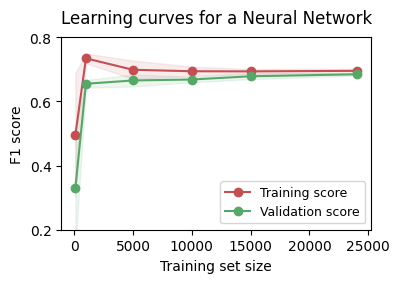

In [487]:
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_nn, train_scores_mean_nn - train_scores_std_nn , train_scores_mean_nn + train_scores_std_nn , alpha=0.1, color="r")
plt.fill_between(train_sizes_nn, validation_scores_mean_nn - validation_scores_std_nn , validation_scores_mean_nn+ validation_scores_std_nn , alpha=0.1, color="g")
plt.plot(train_sizes_nn, train_scores_mean_nn, 'o-', color="r", label="Training score")
plt.plot(train_sizes_nn, validation_scores_mean_nn, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for a Neural Network', fontsize = 12, y = 1.03)
plt.legend(fontsize = 9)
plt.ylim(0.2,0.8)

In [ ]:
# checking performance of the final model on test set

In [464]:
start = time.time()
estimator_final.fit(X_train_scale,y_train)
end = time.time()
print('fit time: {:.6f}s'.format(end - start))

fit time: 2.226106s


In [465]:
start = time.time()
y_pred=estimator_final.predict(X_test_scale)
end = time.time()
print('predict time: {:.6f}s'.format(end - start))

predict time: 0.097358s


Text(-7.75, 0.5, 'True label')

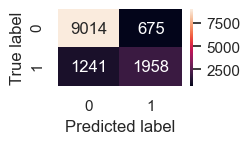

In [466]:
plt.figure(figsize=(2,1))
matrix=confusion_matrix(y_test,y_pred)
sns.set(font_scale=1)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [467]:
precision_scorer(estimator_final, X_test_scale,y_test)

0.7436384352449678

In [468]:
recall_scorer(estimator_final, X_test_scale,y_test)

0.6120662707095967

In [469]:
f1_scorer(estimator_final, X_test_scale,y_test)

0.6714677640603567

In [470]:
roc_auc_scorer(estimator_final, X_test_scale,y_test)

0.9100846743217019

In [471]:
accuracy_scorer(estimator_final, X_test_scale,y_test)

0.8513345747982619

In [ ]:
# learning curves for final model

In [521]:
history = estimator_final.fit(X_train2, y_train2, callbacks=f1_callback,validation_data=(X_val,y_val))

epoch:  1  val_f1: 0.6564885496183206 train_f1: 0.6523110386079392
epoch:  2  val_f1: 0.6903370786516854 train_f1: 0.6942736356648733
epoch:  3  val_f1: 0.6614766449020593 train_f1: 0.6605385530442306
epoch:  4  val_f1: 0.669256920835357 train_f1: 0.6798272671190624
epoch:  5  val_f1: 0.6763990267639902 train_f1: 0.6820523387595302
epoch:  6  val_f1: 0.6877488873272429 train_f1: 0.6964054565368913
epoch:  7  val_f1: 0.6656826568265682 train_f1: 0.6763805300390666
epoch:  8  val_f1: 0.6696340257171118 train_f1: 0.6754422914911542
epoch:  9  val_f1: 0.6720509055310817 train_f1: 0.6822916666666667
epoch:  10  val_f1: 0.6816674561819044 train_f1: 0.6898708635996772
epoch:  11  val_f1: 0.6777697320782041 train_f1: 0.6917077175697866
epoch:  12  val_f1: 0.6689553702795488 train_f1: 0.6816471571906356
epoch:  13  val_f1: 0.6881222505209539 train_f1: 0.6977021784541928
epoch:  14  val_f1: 0.6909421939007738 train_f1: 0.7016757599376462


Text(0, 0.5, 'F1 score')

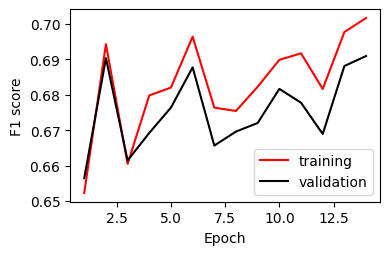

In [522]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,15))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

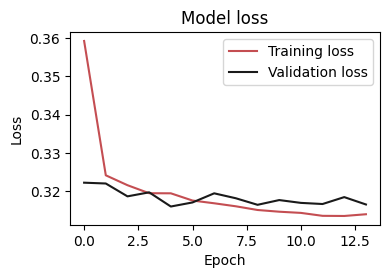

In [523]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [ ]:
#adaboost

In [281]:
ada = AdaBoostClassifier(random_state=21)

In [282]:
accuracy_score_ada = np.mean(cross_val_score(ada,X_train_scale, y_train, scoring ='accuracy' , cv=5))
precision_score_ada = np.mean(cross_val_score(ada,X_train_scale, y_train, scoring ='precision' , cv=5))
recall_score_ada = np.mean(cross_val_score(ada,X_train_scale, y_train, scoring ='recall' , cv=5))
roc_auc_score_ada=np.mean(cross_val_score(ada,X_train_scale, y_train, scoring ='roc_auc' , cv=5))
f1_ada=np.mean(cross_val_score(ada,X_train_scale, y_train, scoring ='f1' , cv=5))

In [283]:
accuracy_score_ada

0.8573424381624367

In [284]:
precision_score_ada

0.7612527970962153

In [285]:
recall_score_ada 

0.6195918755802323

In [286]:
roc_auc_score_ada

0.9129701394014379

In [287]:
f1_ada

0.6831107838117333

In [ ]:
# building base adaboost model and checking its performance

In [288]:
train_sizes_ada, training_scores_ada, validation_scores_ada, fit_times_ada, _ = learning_curve(ada, X_train, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1', return_times=True)

In [289]:
train_scores_mean_ada = np.mean(training_scores_ada,axis = 1)
validation_scores_mean_ada = np.mean(validation_scores_ada, axis = 1 )
train_scores_std_ada = np.std(training_scores_ada,axis = 1)
validation_scores_std_ada = np.std(validation_scores_ada, axis = 1 )
fit_times_mean_ada=np.mean(fit_times_ada,axis=1)
fit_times_std_ada=np.std(fit_times_ada,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_ada, index = train_sizes_ada))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_ada, index = train_sizes_ada))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_ada, index = train_sizes_ada))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_ada, index = train_sizes_ada))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_ada, index=train_sizes_ada))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_ada, index=train_sizes_ada))

Mean training scores

 100      1.000000
1000     0.710969
5000     0.689062
10000    0.684229
15000    0.682423
24057    0.686852
dtype: float64

 --------------------
Mean validation scores

 100      0.534507
1000     0.653696
5000     0.678619
10000    0.680017
15000    0.682203
24057    0.683111
dtype: float64

 --------------------
Std training scores

 100      0.000000
1000     0.015559
5000     0.017207
10000    0.004969
15000    0.005825
24057    0.004527
dtype: float64

 --------------------
Std validation scores

 100      0.035318
1000     0.004900
5000     0.005692
10000    0.008279
15000    0.005121
24057    0.004591
dtype: float64

 --------------------
fit time

 100      0.080857
1000     0.116551
5000     0.273762
10000    0.467775
15000    0.662748
24057    1.049860
dtype: float64

 --------------------
fit time

 100      0.003321
1000     0.003093
5000     0.005381
10000    0.015464
15000    0.012289
24057    0.041406
dtype: float64


(0.4, 1.0)

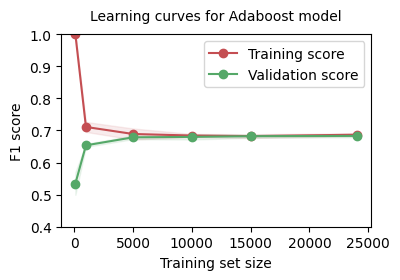

In [605]:
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_ada, train_scores_mean_ada - train_scores_std_ada, train_scores_mean_ada + train_scores_std_ada, alpha=0.1, color="r")
plt.fill_between(train_sizes_ada, validation_scores_mean_ada - validation_scores_std_ada  , validation_scores_mean_ada+ validation_scores_std_ada , alpha=0.1, color="g")
plt.plot(train_sizes_ada, train_scores_mean_ada, 'o-', color="r", label="Training score")
plt.plot(train_sizes_ada, validation_scores_mean_ada, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for Adaboost model', fontsize = 10, y = 1.03)
plt.legend()
plt.ylim(0.4,1)

In [ ]:
# checking for best hyperparameters using grid search and model complexity curve

In [291]:
param_grid = {'base_estimator': [None,DecisionTreeClassifier(ccp_alpha=0.1),DecisionTreeClassifier(ccp_alpha=0.5),DecisionTreeClassifier(ccp_alpha=0.0)]}
# Create a basic model
ada =  AdaBoostClassifier(random_state=21)
# Instantiate the grid search model
ada_coarse_grid1 = GridSearchCV(estimator = ada, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 0, scoring = 'f1' )
ada_coarse_grid1.fit(X_train, y_train)
print(ada_coarse_grid1.best_params_)
score=ada_coarse_grid1.best_score_
print("f1: %s" % '{:.2%}'.format(score))

{'base_estimator': None}
f1: 68.31%


In [293]:
param_grid = {'n_estimators': [50,100,600],'base_estimator': [None,DecisionTreeClassifier(ccp_alpha=0.1),DecisionTreeClassifier(ccp_alpha=0.5),DecisionTreeClassifier(ccp_alpha=0.0)]}
# Create a basic model
ada =  AdaBoostClassifier(random_state=21)
# Instantiate the grid search model
ada_coarse_grid1 = GridSearchCV(estimator = ada, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 0, scoring = 'f1' )
ada_coarse_grid1.fit(X_train, y_train)
print(ada_coarse_grid1.best_params_)
score=ada_coarse_grid1.best_score_
print("f1: %s" % '{:.2%}'.format(score))

{'base_estimator': None, 'n_estimators': 600}
f1: 70.79%


In [294]:
n_estimators= [100,200,300,400,500,600,700,800,900,1000]

# Create a basic model
ada2= AdaBoostClassifier(random_state=21,base_estimator=None)
train_score_ada2, val_score_ada2 = validation_curve(ada2 ,X_train, y_train,
                                          param_name ='n_estimators', param_range=n_estimators, cv=5, scoring='f1', n_jobs=-1, verbose=1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.0min finished


Text(0, 0.5, 'F1 score')

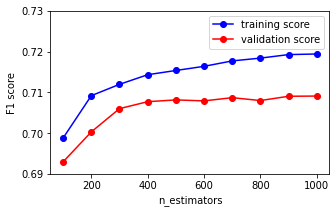

In [299]:
plt.figure(figsize=(5,3))
plt.plot(n_estimators, np.mean(train_score_ada2, axis=1),'o-', color='blue', label='training score')
plt.plot(n_estimators, np.mean(val_score_ada2, axis=1), 'o-',color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0.69, 0.73)
plt.xlabel('n_estimators')
plt.ylabel('F1 score')

In [ ]:
# building and checking performance of final adaboost model 

In [300]:
ada3= AdaBoostClassifier(random_state=21,base_estimator=None,n_estimators=700)

In [301]:
train_sizes_ada3, training_scores_ada3, validation_scores_ada3, fit_times_ada3, _ = learning_curve(ada3, X_train_scale, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1', return_times=True)

In [302]:
train_scores_mean_ada3 = np.mean(training_scores_ada3,axis = 1)
validation_scores_mean_ada3 = np.mean(validation_scores_ada3, axis = 1 )
train_scores_std_ada3 = np.std(training_scores_ada3,axis = 1)
validation_scores_std_ada3 = np.std(validation_scores_ada3, axis = 1 )
fit_times_mean_ada3=np.mean(fit_times_ada3,axis=1)
fit_times_std_ada3=np.std(fit_times_ada3,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_ada3, index = train_sizes_ada3))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_ada3, index = train_sizes_ada3))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_ada3, index = train_sizes_ada3))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_ada3, index = train_sizes_ada3))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_ada3, index=train_sizes_ada3))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_ada3, index=train_sizes_ada3))

Mean training scores

 100      1.000000
1000     0.847459
5000     0.739605
10000    0.727359
15000    0.721981
24057    0.717623
dtype: float64

 --------------------
Mean validation scores

 100      0.539732
1000     0.633891
5000     0.694284
10000    0.700281
15000    0.705931
24057    0.708331
dtype: float64

 --------------------
Std training scores

 100      0.000000
1000     0.020240
5000     0.010186
10000    0.005884
15000    0.005788
24057    0.001484
dtype: float64

 --------------------
Std validation scores

 100      0.025056
1000     0.018535
5000     0.010191
10000    0.009952
15000    0.006069
24057    0.002929
dtype: float64

 --------------------
fit time

 100       1.120440
1000      1.608536
5000      3.737461
10000     6.409283
15000     9.178220
24057    14.199460
dtype: float64

 --------------------
fit time

 100      0.035167
1000     0.030774
5000     0.045774
10000    0.097548
15000    0.147147
24057    0.130115
dtype: float64


In [379]:
plt.style.use('default')

(0.4, 1.0)

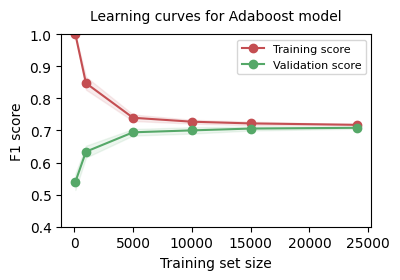

In [607]:
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_ada3, train_scores_mean_ada3 - train_scores_std_ada3, train_scores_mean_ada3 + train_scores_std_ada3, alpha=0.1, color="r")
plt.fill_between(train_sizes_ada3, validation_scores_mean_ada3 - validation_scores_std_ada3  , validation_scores_mean_ada3+ validation_scores_std_ada3 , alpha=0.1, color="g")
plt.plot(train_sizes_ada3, train_scores_mean_ada3, 'o-', color="r", label="Training score")
plt.plot(train_sizes_ada3, validation_scores_mean_ada3, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for Adaboost model', fontsize = 10, y = 1.03)
plt.legend(fontsize = 8)
plt.ylim(0.4,1)

In [ ]:
# checking performance of final adaboost model on test set

In [580]:
start = time.time()
ada3.fit(X_train_scale,y_train)
end = time.time()
print('fit time: {:.6f}s'.format(end - start))

fit time: 17.782092s


In [581]:
start = time.time()
y_pred_ada=ada3.predict(X_test_scale)
end = time.time()
print('predict time: {:.6f}s'.format(end - start))

predict time: 1.331910s


Text(20.72222222222222, 0.5, 'True label')

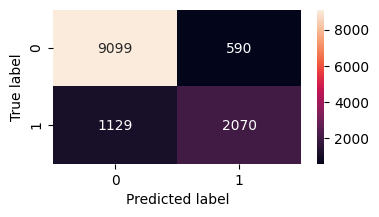

In [582]:
plt.figure(figsize=(4,2))
matrix=confusion_matrix(y_test,y_pred_ada)
#sns.set(font_scale=1)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')


In [583]:
precision_scorer(ada3, X_test_scale,y_test)

0.7781954887218046

In [584]:
recall_scorer(ada3, X_test_scale,y_test)

0.647077211628634

In [585]:
f1_scorer(ada3, X_test_scale,y_test)

0.706605222734255

In [586]:
roc_auc_scorer(ada3, X_test_scale,y_test)

0.9255210926652271

In [587]:
accuracy_scorer(ada3, X_test_scale,y_test)

0.8666201117318436